---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [2]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

Cost Item Purchased   Name
Store 1  22.5         Sponge  Chris
Store 1   2.5   Kitty Litter  Kevyn
Store 2   5.0          Spoon  Filip

In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

Cost Item Purchased   Name        Date
Store 1  22.5         Sponge  Chris  December 1
Store 1   2.5   Kitty Litter  Kevyn   January 1
Store 2   5.0          Spoon  Filip     mid-May

In [3]:
df['Delivered'] = True
df

Cost Item Purchased   Name        Date  Delivered
Store 1  22.5         Sponge  Chris  December 1       True
Store 1   2.5   Kitty Litter  Kevyn   January 1       True
Store 2   5.0          Spoon  Filip     mid-May       True

In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

Cost Item Purchased   Name        Date  Delivered  Feedback
Store 1  22.5         Sponge  Chris  December 1       True  Positive
Store 1   2.5   Kitty Litter  Kevyn   January 1       True      None
Store 2   5.0          Spoon  Filip     mid-May       True  Negative

In [6]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 1: 'mid-May'})
adf

index  Cost Item Purchased   Name        Date  Delivered  Feedback
0  Store 1  22.5         Sponge  Chris  December 1       True  Positive
1  Store 1   2.5   Kitty Litter  Kevyn     mid-May       True      None
2  Store 2   5.0          Spoon  Filip         NaN       True  Negative

In [7]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [11]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Kelly  Director of HR          NaN
Mike              NaN          Law
Sally  Course liasion  Engineering

In [12]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

Role       School
Name                              
Sally  Course liasion  Engineering
James          Grader     Business

In [13]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

Role       School
Name                              
Kelly  Director of HR          NaN
Sally  Course liasion  Engineering
James          Grader     Business

In [14]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Mike              NaN          Law
Sally  Course liasion  Engineering

In [15]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

Name            Role       School
0  Kelly  Director of HR          NaN
1  Sally  Course liasion  Engineering
2  James          Grader     Business

In [16]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

Location_x   Name            Role            Location_y       School
0       State Street  Kelly  Director of HR                   NaN          NaN
1  Washington Avenue  Sally  Course liasion   512 Wilson Crescent  Engineering
2  Washington Avenue  James          Grader  1024 Billiard Avenue     Business

In [17]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

First Name Last Name            Role       School
0      Sally    Brooks  Course liasion  Engineering

# Idiomatic Pandas: Making Code Pandorable

In [1]:
import pandas as pd
df = pd.read_csv('census.csv')
df

SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME             CTYNAME  \
0         40       3         6      1       0    Alabama             Alabama   
1         50       3         6      1       1    Alabama      Autauga County   
2         50       3         6      1       3    Alabama      Baldwin County   
3         50       3         6      1       5    Alabama      Barbour County   
4         50       3         6      1       7    Alabama         Bibb County   
5         50       3         6      1       9    Alabama       Blount County   
6         50       3         6      1      11    Alabama      Bullock County   
7         50       3         6      1      13    Alabama       Butler County   
8         50       3         6      1      15    Alabama      Calhoun County   
9         50       3         6      1      17    Alabama     Chambers County   
10        50       3         6      1      19    Alabama     Cherokee County   
11        50       3         6      1      21    Alabama      Chilton County   
12        50       3         6      1      23    Alabama      Choctaw County   
13        50       3         6      1      25    Alabama       Clarke County   
14        50       3         6      1      27    Alabama         Clay County   
15        50       3         6      1      29    Alabama     Cleburne County   
16        50       3         6      1      31    Alabama       Coffee County   
17        50       3         6      1      33    Alabama      Colbert County   
18        50       3         6      1      35    Alabama      Conecuh County   
19        50       3         6      1      37    Alabama        Coosa County   
20        50       3         6      1      39    Alabama    Covington County   
21        50       3         6      1      41    Alabama     Crenshaw County   
22        50       3         6      1      43    Alabama      Cullman County   
23        50       3         6      1      45    Alabama         Dale County   
24        50       3         6      1      47    Alabama       Dallas County   
25        50       3         6      1      49    Alabama       DeKalb County   
26        50       3         6      1      51    Alabama       Elmore County   
27        50       3         6      1      53    Alabama     Escambia County   
28        50       3         6      1      55    Alabama       Etowah County   
29        50       3         6      1      57    Alabama      Fayette County   
...      ...     ...       ...    ...     ...        ...                 ...   
3163      50       2         3     55     131  Wisconsin   Washington County   
3164      50       2         3     55     133  Wisconsin     Waukesha County   
3165      50       2         3     55     135  Wisconsin      Waupaca County   
3166      50       2         3     55     137  Wisconsin     Waushara County   
3167      50       2         3     55     139  Wisconsin    Winnebago County   
3168      50       2         3     55     141  Wisconsin         Wood County   
3169      40       4         8     56       0    Wyoming             Wyoming   
3170      50       4         8     56       1    Wyoming       Albany County   
3171      50       4         8     56       3    Wyoming     Big Horn County   
3172      50       4         8     56       5    Wyoming     Campbell County   
3173      50       4         8     56       7    Wyoming       Carbon County   
3174      50       4         8     56       9    Wyoming     Converse County   
3175      50       4         8     56      11    Wyoming        Crook County   
3176      50       4         8     56      13    Wyoming      Fremont County   
3177      50       4         8     56      15    Wyoming       Goshen County   
3178      50       4         8     56      17    Wyoming  Hot Springs County   
3179      50       4         8     56      19    Wyoming      Johnson County   
3180      50       4         8     56      21    Wyoming      Laramie County   
3181  

In [2]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [3]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [4]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [5]:
df.apply(min_max, axis=1)

max       min
STNAME    CTYNAME                               
Alabama   Autauga County       55347.0   54660.0
          Baldwin County      203709.0  183193.0
          Barbour County       27341.0   26489.0
          Bibb County          22861.0   22512.0
          Blount County        57776.0   57373.0
          Bullock County       10887.0   10606.0
          Butler County        20944.0   20154.0
          Calhoun County      118437.0  115620.0
          Chambers County      34153.0   33993.0
          Cherokee County      26084.0   25859.0
          Chilton County       43943.0   43665.0
          Choctaw County       13841.0   13170.0
          Clarke County        25767.0   24675.0
          Clay County          13880.0   13456.0
          Cleburne County      15072.0   14921.0
          Coffee County        51211.0   50177.0
          Colbert County       54514.0   54354.0
          Conecuh County       13208.0   12662.0
          Coosa County         11758.0   10724.0
          Covington County     38060.0   37796.0
          Crenshaw County      13963.0   13853.0
          Cullman County       82005.0   80374.0
          Dale County          50358.0   49501.0
          Dallas County        43803.0   41131.0
          DeKalb County        71387.0   70869.0
          Elmore County        81468.0   79465.0
          Escambia County      38309.0   37784.0
          Etowah County       104442.0  103057.0
          Fayette County       17231.0   16759.0
          Franklin County      31734.0   31507.0
...                                ...       ...
Wisconsin Washburn County      15930.0   15552.0
          Washington County   133674.0  131967.0
          Waukesha County     396488.0  390076.0
          Waupaca County       52422.0   51945.0
          Waushara County      24581.0   24033.0
          Winnebago County    169639.0  167059.0
          Wood County          74807.0   73435.0
Wyoming   Albany County        37956.0   36428.0
          Big Horn County      12022.0   11672.0
          Campbell County      49220.0   46244.0
          Carbon County        15856.0   15559.0
          Converse County      14343.0   13728.0
          Crook County          7444.0    7114.0
          Fremont County       41129.0   40222.0
          Goshen County        13666.0   13383.0
          Hot Springs County    4846.0    4741.0
          Johnson County        8636.0    8552.0
          Laramie County       97121.0   92271.0
          Lincoln County       18722.0   17943.0
          Natrona County       82178.0   75472.0
          Niobrara County       2548.0    2475.0
          Park County          29237.0   28259.0
          Platte County         8812.0    8678.0
          Sheridan County      30020.0   29146.0
          Sublette County      10418.0    9899.0
          Sweetwater County    45162.0   43593.0
          Teton County         23125.0   21297.0
          Uinta County         21102.0   20822.0
          Washakie County       8545.0    8316.0
          Weston County         7234.0    7065.0

[3142 rows x 2 columns]

In [6]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [8]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME     CTYNAME           
Alabama    Autauga County         55347.0
           Baldwin County        203709.0
           Barbour County         27341.0
           Bibb County            22861.0
           Blount County          57776.0
           Bullock County         10887.0
           Butler County          20944.0
           Calhoun County        118437.0
           Chambers County        34153.0
           Cherokee County        26084.0
           Chilton County         43943.0
           Choctaw County         13841.0
           Clarke County          25767.0
           Clay County            13880.0
           Cleburne County        15072.0
           Coffee County          51211.0
           Colbert County         54514.0
           Conecuh County         13208.0
           Coosa County           11758.0
           Covington County       38060.0
           Crenshaw County        13963.0
           Cullman County         82005.0
           Dale County            50358.0
    

# Group by

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME             CTYNAME  \
1         50       3         6      1       1    Alabama      Autauga County   
2         50       3         6      1       3    Alabama      Baldwin County   
3         50       3         6      1       5    Alabama      Barbour County   
4         50       3         6      1       7    Alabama         Bibb County   
5         50       3         6      1       9    Alabama       Blount County   
6         50       3         6      1      11    Alabama      Bullock County   
7         50       3         6      1      13    Alabama       Butler County   
8         50       3         6      1      15    Alabama      Calhoun County   
9         50       3         6      1      17    Alabama     Chambers County   
10        50       3         6      1      19    Alabama     Cherokee County   
11        50       3         6      1      21    Alabama      Chilton County   
12        50       3         6      1      23    Alabama      Choctaw County   
13        50       3         6      1      25    Alabama       Clarke County   
14        50       3         6      1      27    Alabama         Clay County   
15        50       3         6      1      29    Alabama     Cleburne County   
16        50       3         6      1      31    Alabama       Coffee County   
17        50       3         6      1      33    Alabama      Colbert County   
18        50       3         6      1      35    Alabama      Conecuh County   
19        50       3         6      1      37    Alabama        Coosa County   
20        50       3         6      1      39    Alabama    Covington County   
21        50       3         6      1      41    Alabama     Crenshaw County   
22        50       3         6      1      43    Alabama      Cullman County   
23        50       3         6      1      45    Alabama         Dale County   
24        50       3         6      1      47    Alabama       Dallas County   
25        50       3         6      1      49    Alabama       DeKalb County   
26        50       3         6      1      51    Alabama       Elmore County   
27        50       3         6      1      53    Alabama     Escambia County   
28        50       3         6      1      55    Alabama       Etowah County   
29        50       3         6      1      57    Alabama      Fayette County   
30        50       3         6      1      59    Alabama     Franklin County   
...      ...     ...       ...    ...     ...        ...                 ...   
3162      50       2         3     55     129  Wisconsin     Washburn County   
3163      50       2         3     55     131  Wisconsin   Washington County   
3164      50       2         3     55     133  Wisconsin     Waukesha County   
3165      50       2         3     55     135  Wisconsin      Waupaca County   
3166      50       2         3     55     137  Wisconsin     Waushara County   
3167      50       2         3     55     139  Wisconsin    Winnebago County   
3168      50       2         3     55     141  Wisconsin         Wood County   
3170      50       4         8     56       1    Wyoming       Albany County   
3171      50       4         8     56       3    Wyoming     Big Horn County   
3172      50       4         8     56       5    Wyoming     Campbell County   
3173      50       4         8     56       7    Wyoming       Carbon County   
3174      50       4         8     56       9    Wyoming     Converse County   
3175      50       4         8     56      11    Wyoming        Crook County   
3176      50       4         8     56      13    Wyoming      Fremont County   
3177      50       4         8     56      15    Wyoming       Goshen County   
3178      50       4         8     56      17    Wyoming  Hot Springs County   
3179      50       4         8     56      19    Wyoming      Johnson County   
3180      50       4         8     56      21    Wyoming      Laramie County   
3181  

In [10]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New

Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.379310

Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Cou

Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi ha

Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Countie

Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in 

Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachus

Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties

Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counti

Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Ke

Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Count

Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Count

Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state

Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in stat

Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
C

Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state 

Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Count

Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667


Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties

KeyboardInterrupt: 

In [ ]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    #print(group)
    #print(frame)
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Alabama
    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
6       50       3         6      1      11  Alabama     Bullock County   
7       50       3         6      1      13  Alabama      Butler County   
8       50       3         6      1      15  Alabama     Calhoun County   
9       50       3         6      1      17  Alabama    Chambers County   
10      50       3         6      1      19  Alabama    Cherokee County   
11      50       3         6      1      21  Alabama     Chilton County   
12      50       3         6      1      23  Alabama     Choctaw County   
13      50       

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
250      50       4         8      8       1  Colorado        Adams County   
251      50       4         8      8       3  Colorado      Alamosa County   
252      50       4         8      8       5  Colorado     Arapahoe County   
253      50       4         8      8       7  Colorado    Archuleta County   
254      50       4         8      8       9  Colorado         Baca County   
255      50       4         8      8      11  Colorado         Bent County   
256      50       4         8      8      13  Colorado      Boulder County   
257      50       4         8      8      14  Colorado   Broomfield County   
258      50       4         8      8      15  Colorado      Chaffee County   
259      50       4         8      8      17  Colorado     Cheyenne County   
260      50       4         8      8      19  Colorado  Clear Creek County   
261      50       4         8      8      21  Colorado      Cone

Florida
     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME              CTYNAME  \
330      50       3         5     12       1  Florida       Alachua County   
331      50       3         5     12       3  Florida         Baker County   
332      50       3         5     12       5  Florida           Bay County   
333      50       3         5     12       7  Florida      Bradford County   
334      50       3         5     12       9  Florida       Brevard County   
335      50       3         5     12      11  Florida       Broward County   
336      50       3         5     12      13  Florida       Calhoun County   
337      50       3         5     12      15  Florida     Charlotte County   
338      50       3         5     12      17  Florida        Citrus County   
339      50       3         5     12      19  Florida          Clay County   
340      50       3         5     12      21  Florida       Collier County   
341      50       3         5     12      23  Florida   

Idaho
     SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
564      50       4         8     16       1  Idaho         Ada County   
565      50       4         8     16       3  Idaho       Adams County   
566      50       4         8     16       5  Idaho     Bannock County   
567      50       4         8     16       7  Idaho   Bear Lake County   
568      50       4         8     16       9  Idaho     Benewah County   
569      50       4         8     16      11  Idaho     Bingham County   
570      50       4         8     16      13  Idaho      Blaine County   
571      50       4         8     16      15  Idaho       Boise County   
572      50       4         8     16      17  Idaho      Bonner County   
573      50       4         8     16      19  Idaho  Bonneville County   
574      50       4         8     16      21  Idaho    Boundary County   
575      50       4         8     16      23  Idaho       Butte County   
576      50       4         8   

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME             CTYNAME  \
712      50       2         3     18       1  Indiana        Adams County   
713      50       2         3     18       3  Indiana        Allen County   
714      50       2         3     18       5  Indiana  Bartholomew County   
715      50       2         3     18       7  Indiana       Benton County   
716      50       2         3     18       9  Indiana    Blackford County   
717      50       2         3     18      11  Indiana        Boone County   
718      50       2         3     18      13  Indiana        Brown County   
719      50       2         3     18      15  Indiana      Carroll County   
720      50       2         3     18      17  Indiana         Cass County   
721      50       2         3     18      19  Indiana        Clark County   
722      50       2         3     18      21  Indiana         Clay County   
723      50       2         3     18      23  Indiana      Clinton County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
905       50       2         4     20       1  Kansas       Allen County   
906       50       2         4     20       3  Kansas    Anderson County   
907       50       2         4     20       5  Kansas    Atchison County   
908       50       2         4     20       7  Kansas      Barber County   
909       50       2         4     20       9  Kansas      Barton County   
910       50       2         4     20      11  Kansas     Bourbon County   
911       50       2         4     20      13  Kansas       Brown County   
912       50       2         4     20      15  Kansas      Butler County   
913       50       2         4     20      17  Kansas       Chase County   
914       50       2         4     20      19  Kansas  Chautauqua County   
915       50       2         4     20      21  Kansas    Cherokee County   
916       50       2         4     20      23  Kansas    Cheyenne County   
917       50

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1132      50       3         7     22       1  Louisiana   
1133      50       3         7     22       3  Louisiana   
1134      50       3         7     22       5  Louisiana   
1135      50       3         7     22       7  Louisiana   
1136      50       3         7     22       9  Louisiana   
1137      50       3         7     22      11  Louisiana   
1138      50       3         7     22      13  Louisiana   
1139      50       3         7     22      15  Louisiana   
1140      50       3         7     22      17  Louisiana   
1141      50       3         7     22      19  Louisiana   
1142      50       3         7     22      21  Louisiana   
1143      50       3         7     22      23  Louisiana   
1144      50       3         7     22      25  Louisiana   
1145      50       3         7     22      27  Louisiana   
1146      50       3         7     22      29  Louisiana   
1147      50       3         7     22   

      SUMLEV  REGION  DIVISION  STATE  COUNTY         STNAME  \
1239      50       1         1     25       1  Massachusetts   
1240      50       1         1     25       3  Massachusetts   
1241      50       1         1     25       5  Massachusetts   
1242      50       1         1     25       7  Massachusetts   
1243      50       1         1     25       9  Massachusetts   
1244      50       1         1     25      11  Massachusetts   
1245      50       1         1     25      13  Massachusetts   
1246      50       1         1     25      15  Massachusetts   
1247      50       1         1     25      17  Massachusetts   
1248      50       1         1     25      19  Massachusetts   
1249      50       1         1     25      21  Massachusetts   
1250      50       1         1     25      23  Massachusetts   
1251      50       1         1     25      25  Massachusetts   
1252      50       1         1     25      27  Massachusetts   

                CTYNAME  CENSUS2010POP 

      SUMLEV  REGION  DIVISION  STATE  COUNTY       STNAME  \
1426      50       3         6     28       1  Mississippi   
1427      50       3         6     28       3  Mississippi   
1428      50       3         6     28       5  Mississippi   
1429      50       3         6     28       7  Mississippi   
1430      50       3         6     28       9  Mississippi   
1431      50       3         6     28      11  Mississippi   
1432      50       3         6     28      13  Mississippi   
1433      50       3         6     28      15  Mississippi   
1434      50       3         6     28      17  Mississippi   
1435      50       3         6     28      19  Mississippi   
1436      50       3         6     28      21  Mississippi   
1437      50       3         6     28      23  Mississippi   
1438      50       3         6     28      25  Mississippi   
1439      50       3         6     28      27  Mississippi   
1440      50       3         6     28      29  Mississippi   
1441    

      SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME  \
1625      50       4         8     30       1  Montana   
1626      50       4         8     30       3  Montana   
1627      50       4         8     30       5  Montana   
1628      50       4         8     30       7  Montana   
1629      50       4         8     30       9  Montana   
1630      50       4         8     30      11  Montana   
1631      50       4         8     30      13  Montana   
1632      50       4         8     30      15  Montana   
1633      50       4         8     30      17  Montana   
1634      50       4         8     30      19  Montana   
1635      50       4         8     30      21  Montana   
1636      50       4         8     30      23  Montana   
1637      50       4         8     30      25  Montana   
1638      50       4         8     30      27  Montana   
1639      50       4         8     30      29  Montana   
1640      50       4         8     30      31  Montana   
1641      50  

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
1776      50       4         8     32       1  Nevada   Churchill County   
1777      50       4         8     32       3  Nevada       Clark County   
1778      50       4         8     32       5  Nevada     Douglas County   
1779      50       4         8     32       7  Nevada        Elko County   
1780      50       4         8     32       9  Nevada   Esmeralda County   
1781      50       4         8     32      11  Nevada      Eureka County   
1782      50       4         8     32      13  Nevada    Humboldt County   
1783      50       4         8     32      15  Nevada      Lander County   
1784      50       4         8     32      17  Nevada     Lincoln County   
1785      50       4         8     32      19  Nevada        Lyon County   
1786      50       4         8     32      21  Nevada     Mineral County   
1787      50       4         8     32      23  Nevada         Nye County   
1788      50

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1861      50       1         2     36       1  New York        Albany County   
1862      50       1         2     36       3  New York      Allegany County   
1863      50       1         2     36       5  New York         Bronx County   
1864      50       1         2     36       7  New York        Broome County   
1865      50       1         2     36       9  New York   Cattaraugus County   
1866      50       1         2     36      11  New York        Cayuga County   
1867      50       1         2     36      13  New York    Chautauqua County   
1868      50       1         2     36      15  New York       Chemung County   
1869      50       1         2     36      17  New York      Chenango County   
1870      50       1         2     36      19  New York       Clinton County   
1871      50       1         2     36      21  New York      Columbia County   
1872      50       1         2     36   

Oklahoma
      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2168      50       3         7     40       1  Oklahoma         Adair County   
2169      50       3         7     40       3  Oklahoma       Alfalfa County   
2170      50       3         7     40       5  Oklahoma         Atoka County   
2171      50       3         7     40       7  Oklahoma        Beaver County   
2172      50       3         7     40       9  Oklahoma       Beckham County   
2173      50       3         7     40      11  Oklahoma        Blaine County   
2174      50       3         7     40      13  Oklahoma         Bryan County   
2175      50       3         7     40      15  Oklahoma         Caddo County   
2176      50       3         7     40      17  Oklahoma      Canadian County   
2177      50       3         7     40      19  Oklahoma        Carter County   
2178      50       3         7     40      21  Oklahoma      Cherokee County   
2179      50       3         7 

      SUMLEV  REGION  DIVISION  STATE  COUNTY          STNAME  \
2357      50       3         5     45       1  South Carolina   
2358      50       3         5     45       3  South Carolina   
2359      50       3         5     45       5  South Carolina   
2360      50       3         5     45       7  South Carolina   
2361      50       3         5     45       9  South Carolina   
2362      50       3         5     45      11  South Carolina   
2363      50       3         5     45      13  South Carolina   
2364      50       3         5     45      15  South Carolina   
2365      50       3         5     45      17  South Carolina   
2366      50       3         5     45      19  South Carolina   
2367      50       3         5     45      21  South Carolina   
2368      50       3         5     45      23  South Carolina   
2369      50       3         5     45      25  South Carolina   
2370      50       3         5     45      27  South Carolina   
2371      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME            CTYNAME  \
2471      50       3         6     47       1  Tennessee    Anderson County   
2472      50       3         6     47       3  Tennessee     Bedford County   
2473      50       3         6     47       5  Tennessee      Benton County   
2474      50       3         6     47       7  Tennessee     Bledsoe County   
2475      50       3         6     47       9  Tennessee      Blount County   
2476      50       3         6     47      11  Tennessee     Bradley County   
2477      50       3         6     47      13  Tennessee    Campbell County   
2478      50       3         6     47      15  Tennessee      Cannon County   
2479      50       3         6     47      17  Tennessee     Carroll County   
2480      50       3         6     47      19  Tennessee      Carter County   
2481      50       3         6     47      21  Tennessee    Cheatham County   
2482      50       3         6     47      23  Tenne

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
2822      50       4         8     49       1   Utah      Beaver County   
2823      50       4         8     49       3   Utah   Box Elder County   
2824      50       4         8     49       5   Utah       Cache County   
2825      50       4         8     49       7   Utah      Carbon County   
2826      50       4         8     49       9   Utah     Daggett County   
2827      50       4         8     49      11   Utah       Davis County   
2828      50       4         8     49      13   Utah    Duchesne County   
2829      50       4         8     49      15   Utah       Emery County   
2830      50       4         8     49      17   Utah    Garfield County   
2831      50       4         8     49      19   Utah       Grand County   
2832      50       4         8     49      21   Utah        Iron County   
2833      50       4         8     49      23   Utah        Juab County   
2834      50       4     

Counties in state Virginia have an average population of 60111.2932331
Washington
      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME  \
3001      50       4         9     53       1  Washington   
3002      50       4         9     53       3  Washington   
3003      50       4         9     53       5  Washington   
3004      50       4         9     53       7  Washington   
3005      50       4         9     53       9  Washington   
3006      50       4         9     53      11  Washington   
3007      50       4         9     53      13  Washington   
3008      50       4         9     53      15  Washington   
3009      50       4         9     53      17  Washington   
3010      50       4         9     53      19  Washington   
3011      50       4         9     53      21  Washington   
3012      50       4         9     53      23  Washington   
3013      50       4         9     53      25  Washington   
3014      50       4         9     53      27  Washington   
301

Wyoming
      SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME             CTYNAME  \
3170      50       4         8     56       1  Wyoming       Albany County   
3171      50       4         8     56       3  Wyoming     Big Horn County   
3172      50       4         8     56       5  Wyoming     Campbell County   
3173      50       4         8     56       7  Wyoming       Carbon County   
3174      50       4         8     56       9  Wyoming     Converse County   
3175      50       4         8     56      11  Wyoming        Crook County   
3176      50       4         8     56      13  Wyoming      Fremont County   
3177      50       4         8     56      15  Wyoming       Goshen County   
3178      50       4         8     56      17  Wyoming  Hot Springs County   
3179      50       4         8     56      19  Wyoming      Johnson County   
3180      50       4         8     56      21  Wyoming      Laramie County   
3181      50       4         8     56      23  Wyoming  

    SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME  \
69      50       4         9      2      13  Alaska   
70      50       4         9      2      16  Alaska   
71      50       4         9      2      20  Alaska   
72      50       4         9      2      50  Alaska   
73      50       4         9      2      60  Alaska   
74      50       4         9      2      68  Alaska   
75      50       4         9      2      70  Alaska   
76      50       4         9      2      90  Alaska   
77      50       4         9      2     100  Alaska   
78      50       4         9      2     105  Alaska   
79      50       4         9      2     110  Alaska   
80      50       4         9      2     122  Alaska   
81      50       4         9      2     130  Alaska   
82      50       4         9      2     150  Alaska   
83      50       4         9      2     158  Alaska   
84      50       4         9      2     164  Alaska   
85      50       4         9      2     170  Alaska   
86      50

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME               CTYNAME  \
398      50       3         5     13       1  Georgia        Appling County   
399      50       3         5     13       3  Georgia       Atkinson County   
400      50       3         5     13       5  Georgia          Bacon County   
401      50       3         5     13       7  Georgia          Baker County   
402      50       3         5     13       9  Georgia        Baldwin County   
403      50       3         5     13      11  Georgia          Banks County   
404      50       3         5     13      13  Georgia         Barrow County   
405      50       3         5     13      15  Georgia         Bartow County   
406      50       3         5     13      17  Georgia       Ben Hill County   
407      50       3         5     13      19  Georgia        Berrien County   
408      50       3         5     13      21  Georgia           Bibb County   
409      50       3         5     13      23  Georgi

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
609      50       2         3     17       1  Illinois        Adams County   
610      50       2         3     17       3  Illinois    Alexander County   
611      50       2         3     17       5  Illinois         Bond County   
612      50       2         3     17       7  Illinois        Boone County   
613      50       2         3     17       9  Illinois        Brown County   
614      50       2         3     17      11  Illinois       Bureau County   
615      50       2         3     17      13  Illinois      Calhoun County   
616      50       2         3     17      15  Illinois      Carroll County   
617      50       2         3     17      17  Illinois         Cass County   
618      50       2         3     17      19  Illinois    Champaign County   
619      50       2         3     17      21  Illinois    Christian County   
620      50       2         3     17      23  Illinois        Cl

     SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME               CTYNAME  \
805      50       2         4     19       1   Iowa          Adair County   
806      50       2         4     19       3   Iowa          Adams County   
807      50       2         4     19       5   Iowa      Allamakee County   
808      50       2         4     19       7   Iowa      Appanoose County   
809      50       2         4     19       9   Iowa        Audubon County   
810      50       2         4     19      11   Iowa         Benton County   
811      50       2         4     19      13   Iowa     Black Hawk County   
812      50       2         4     19      15   Iowa          Boone County   
813      50       2         4     19      17   Iowa         Bremer County   
814      50       2         4     19      19   Iowa       Buchanan County   
815      50       2         4     19      21   Iowa    Buena Vista County   
816      50       2         4     19      23   Iowa         Butler County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1011      50       3         6     21       1  Kentucky         Adair County   
1012      50       3         6     21       3  Kentucky         Allen County   
1013      50       3         6     21       5  Kentucky      Anderson County   
1014      50       3         6     21       7  Kentucky       Ballard County   
1015      50       3         6     21       9  Kentucky        Barren County   
1016      50       3         6     21      11  Kentucky          Bath County   
1017      50       3         6     21      13  Kentucky          Bell County   
1018      50       3         6     21      15  Kentucky         Boone County   
1019      50       3         6     21      17  Kentucky       Bourbon County   
1020      50       3         6     21      19  Kentucky          Boyd County   
1021      50       3         6     21      21  Kentucky         Boyle County   
1022      50       3         6     21   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1214      50       3         5     24       1  Maryland   
1215      50       3         5     24       3  Maryland   
1216      50       3         5     24       5  Maryland   
1217      50       3         5     24       9  Maryland   
1218      50       3         5     24      11  Maryland   
1219      50       3         5     24      13  Maryland   
1220      50       3         5     24      15  Maryland   
1221      50       3         5     24      17  Maryland   
1222      50       3         5     24      19  Maryland   
1223      50       3         5     24      21  Maryland   
1224      50       3         5     24      23  Maryland   
1225      50       3         5     24      25  Maryland   
1226      50       3         5     24      27  Maryland   
1227      50       3         5     24      29  Maryland   
1228      50       3         5     24      31  Maryland   
1229      50       3         5     24      33  Maryland 

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1338      50       2         4     27       1  Minnesota   
1339      50       2         4     27       3  Minnesota   
1340      50       2         4     27       5  Minnesota   
1341      50       2         4     27       7  Minnesota   
1342      50       2         4     27       9  Minnesota   
1343      50       2         4     27      11  Minnesota   
1344      50       2         4     27      13  Minnesota   
1345      50       2         4     27      15  Minnesota   
1346      50       2         4     27      17  Minnesota   
1347      50       2         4     27      19  Minnesota   
1348      50       2         4     27      21  Minnesota   
1349      50       2         4     27      23  Minnesota   
1350      50       2         4     27      25  Minnesota   
1351      50       2         4     27      27  Minnesota   
1352      50       2         4     27      29  Minnesota   
1353      50       2         4     27   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1509      50       2         4     29       1  Missouri   
1510      50       2         4     29       3  Missouri   
1511      50       2         4     29       5  Missouri   
1512      50       2         4     29       7  Missouri   
1513      50       2         4     29       9  Missouri   
1514      50       2         4     29      11  Missouri   
1515      50       2         4     29      13  Missouri   
1516      50       2         4     29      15  Missouri   
1517      50       2         4     29      17  Missouri   
1518      50       2         4     29      19  Missouri   
1519      50       2         4     29      21  Missouri   
1520      50       2         4     29      23  Missouri   
1521      50       2         4     29      25  Missouri   
1522      50       2         4     29      27  Missouri   
1523      50       2         4     29      29  Missouri   
1524      50       2         4     29      31  Missouri 

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1682      50       2         4     31       1  Nebraska         Adams County   
1683      50       2         4     31       3  Nebraska      Antelope County   
1684      50       2         4     31       5  Nebraska        Arthur County   
1685      50       2         4     31       7  Nebraska        Banner County   
1686      50       2         4     31       9  Nebraska        Blaine County   
1687      50       2         4     31      11  Nebraska         Boone County   
1688      50       2         4     31      13  Nebraska     Box Butte County   
1689      50       2         4     31      15  Nebraska          Boyd County   
1690      50       2         4     31      17  Nebraska         Brown County   
1691      50       2         4     31      19  Nebraska       Buffalo County   
1692      50       2         4     31      21  Nebraska          Burt County   
1693      50       2         4     31   

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME            CTYNAME  \
1827      50       4         8     35       1  New Mexico  Bernalillo County   
1828      50       4         8     35       3  New Mexico      Catron County   
1829      50       4         8     35       5  New Mexico      Chaves County   
1830      50       4         8     35       6  New Mexico      Cibola County   
1831      50       4         8     35       7  New Mexico      Colfax County   
1832      50       4         8     35       9  New Mexico       Curry County   
1833      50       4         8     35      11  New Mexico     De Baca County   
1834      50       4         8     35      13  New Mexico    Doña Ana County   
1835      50       4         8     35      15  New Mexico        Eddy County   
1836      50       4         8     35      17  New Mexico       Grant County   
1837      50       4         8     35      19  New Mexico   Guadalupe County   
1838      50       4         8     35   

      SUMLEV  REGION  DIVISION  STATE  COUNTY          STNAME  \
1924      50       3         5     37       1  North Carolina   
1925      50       3         5     37       3  North Carolina   
1926      50       3         5     37       5  North Carolina   
1927      50       3         5     37       7  North Carolina   
1928      50       3         5     37       9  North Carolina   
1929      50       3         5     37      11  North Carolina   
1930      50       3         5     37      13  North Carolina   
1931      50       3         5     37      15  North Carolina   
1932      50       3         5     37      17  North Carolina   
1933      50       3         5     37      19  North Carolina   
1934      50       3         5     37      21  North Carolina   
1935      50       3         5     37      23  North Carolina   
1936      50       3         5     37      25  North Carolina   
1937      50       3         5     37      27  North Carolina   
1938      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2168      50       3         7     40       1  Oklahoma         Adair County   
2169      50       3         7     40       3  Oklahoma       Alfalfa County   
2170      50       3         7     40       5  Oklahoma         Atoka County   
2171      50       3         7     40       7  Oklahoma        Beaver County   
2172      50       3         7     40       9  Oklahoma       Beckham County   
2173      50       3         7     40      11  Oklahoma        Blaine County   
2174      50       3         7     40      13  Oklahoma         Bryan County   
2175      50       3         7     40      15  Oklahoma         Caddo County   
2176      50       3         7     40      17  Oklahoma      Canadian County   
2177      50       3         7     40      19  Oklahoma        Carter County   
2178      50       3         7     40      21  Oklahoma      Cherokee County   
2179      50       3         7     40   

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2283      50       1         2     42       1  Pennsylvania   
2284      50       1         2     42       3  Pennsylvania   
2285      50       1         2     42       5  Pennsylvania   
2286      50       1         2     42       7  Pennsylvania   
2287      50       1         2     42       9  Pennsylvania   
2288      50       1         2     42      11  Pennsylvania   
2289      50       1         2     42      13  Pennsylvania   
2290      50       1         2     42      15  Pennsylvania   
2291      50       1         2     42      17  Pennsylvania   
2292      50       1         2     42      19  Pennsylvania   
2293      50       1         2     42      21  Pennsylvania   
2294      50       1         2     42      23  Pennsylvania   
2295      50       1         2     42      25  Pennsylvania   
2296      50       1         2     42      27  Pennsylvania   
2297      50       1         2     42      29  Pennsylv

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2404      50       2         4     46       3  South Dakota   
2405      50       2         4     46       5  South Dakota   
2406      50       2         4     46       7  South Dakota   
2407      50       2         4     46       9  South Dakota   
2408      50       2         4     46      11  South Dakota   
2409      50       2         4     46      13  South Dakota   
2410      50       2         4     46      15  South Dakota   
2411      50       2         4     46      17  South Dakota   
2412      50       2         4     46      19  South Dakota   
2413      50       2         4     46      21  South Dakota   
2414      50       2         4     46      23  South Dakota   
2415      50       2         4     46      25  South Dakota   
2416      50       2         4     46      27  South Dakota   
2417      50       2         4     46      29  South Dakota   
2418      50       2         4     46      31  South Da

Counties in state Washington have an average population of 172424.102564
West Virginia
      SUMLEV  REGION  DIVISION  STATE  COUNTY         STNAME  \
3041      50       3         5     54       1  West Virginia   
3042      50       3         5     54       3  West Virginia   
3043      50       3         5     54       5  West Virginia   
3044      50       3         5     54       7  West Virginia   
3045      50       3         5     54       9  West Virginia   
3046      50       3         5     54      11  West Virginia   
3047      50       3         5     54      13  West Virginia   
3048      50       3         5     54      15  West Virginia   
3049      50       3         5     54      17  West Virginia   
3050      50       3         5     54      19  West Virginia   
3051      50       3         5     54      21  West Virginia   
3052      50       3         5     54      23  West Virginia   
3053      50       3         5     54      25  West Virginia   
3054      50     

      SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME             CTYNAME  \
3170      50       4         8     56       1  Wyoming       Albany County   
3171      50       4         8     56       3  Wyoming     Big Horn County   
3172      50       4         8     56       5  Wyoming     Campbell County   
3173      50       4         8     56       7  Wyoming       Carbon County   
3174      50       4         8     56       9  Wyoming     Converse County   
3175      50       4         8     56      11  Wyoming        Crook County   
3176      50       4         8     56      13  Wyoming      Fremont County   
3177      50       4         8     56      15  Wyoming       Goshen County   
3178      50       4         8     56      17  Wyoming  Hot Springs County   
3179      50       4         8     56      19  Wyoming      Johnson County   
3180      50       4         8     56      21  Wyoming      Laramie County   
3181      50       4         8     56      23  Wyoming      Linc

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
250      50       4         8      8       1  Colorado        Adams County   
251      50       4         8      8       3  Colorado      Alamosa County   
252      50       4         8      8       5  Colorado     Arapahoe County   
253      50       4         8      8       7  Colorado    Archuleta County   
254      50       4         8      8       9  Colorado         Baca County   
255      50       4         8      8      11  Colorado         Bent County   
256      50       4         8      8      13  Colorado      Boulder County   
257      50       4         8      8      14  Colorado   Broomfield County   
258      50       4         8      8      15  Colorado      Chaffee County   
259      50       4         8      8      17  Colorado     Cheyenne County   
260      50       4         8      8      19  Colorado  Clear Creek County   
261      50       4         8      8      21  Colorado      Cone

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME              CTYNAME  \
330      50       3         5     12       1  Florida       Alachua County   
331      50       3         5     12       3  Florida         Baker County   
332      50       3         5     12       5  Florida           Bay County   
333      50       3         5     12       7  Florida      Bradford County   
334      50       3         5     12       9  Florida       Brevard County   
335      50       3         5     12      11  Florida       Broward County   
336      50       3         5     12      13  Florida       Calhoun County   
337      50       3         5     12      15  Florida     Charlotte County   
338      50       3         5     12      17  Florida        Citrus County   
339      50       3         5     12      19  Florida          Clay County   
340      50       3         5     12      21  Florida       Collier County   
341      50       3         5     12      23  Florida      Colum

Counties in state Hawaii have an average population of 272060.2
Idaho
     SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
564      50       4         8     16       1  Idaho         Ada County   
565      50       4         8     16       3  Idaho       Adams County   
566      50       4         8     16       5  Idaho     Bannock County   
567      50       4         8     16       7  Idaho   Bear Lake County   
568      50       4         8     16       9  Idaho     Benewah County   
569      50       4         8     16      11  Idaho     Bingham County   
570      50       4         8     16      13  Idaho      Blaine County   
571      50       4         8     16      15  Idaho       Boise County   
572      50       4         8     16      17  Idaho      Bonner County   
573      50       4         8     16      19  Idaho  Bonneville County   
574      50       4         8     16      21  Idaho    Boundary County   
575      50       4         8     16      

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME             CTYNAME  \
712      50       2         3     18       1  Indiana        Adams County   
713      50       2         3     18       3  Indiana        Allen County   
714      50       2         3     18       5  Indiana  Bartholomew County   
715      50       2         3     18       7  Indiana       Benton County   
716      50       2         3     18       9  Indiana    Blackford County   
717      50       2         3     18      11  Indiana        Boone County   
718      50       2         3     18      13  Indiana        Brown County   
719      50       2         3     18      15  Indiana      Carroll County   
720      50       2         3     18      17  Indiana         Cass County   
721      50       2         3     18      19  Indiana        Clark County   
722      50       2         3     18      21  Indiana         Clay County   
723      50       2         3     18      23  Indiana      Clinton County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
905       50       2         4     20       1  Kansas       Allen County   
906       50       2         4     20       3  Kansas    Anderson County   
907       50       2         4     20       5  Kansas    Atchison County   
908       50       2         4     20       7  Kansas      Barber County   
909       50       2         4     20       9  Kansas      Barton County   
910       50       2         4     20      11  Kansas     Bourbon County   
911       50       2         4     20      13  Kansas       Brown County   
912       50       2         4     20      15  Kansas      Butler County   
913       50       2         4     20      17  Kansas       Chase County   
914       50       2         4     20      19  Kansas  Chautauqua County   
915       50       2         4     20      21  Kansas    Cherokee County   
916       50       2         4     20      23  Kansas    Cheyenne County   
917       50

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1132      50       3         7     22       1  Louisiana   
1133      50       3         7     22       3  Louisiana   
1134      50       3         7     22       5  Louisiana   
1135      50       3         7     22       7  Louisiana   
1136      50       3         7     22       9  Louisiana   
1137      50       3         7     22      11  Louisiana   
1138      50       3         7     22      13  Louisiana   
1139      50       3         7     22      15  Louisiana   
1140      50       3         7     22      17  Louisiana   
1141      50       3         7     22      19  Louisiana   
1142      50       3         7     22      21  Louisiana   
1143      50       3         7     22      23  Louisiana   
1144      50       3         7     22      25  Louisiana   
1145      50       3         7     22      27  Louisiana   
1146      50       3         7     22      29  Louisiana   
1147      50       3         7     22   

      SUMLEV  REGION  DIVISION  STATE  COUNTY         STNAME  \
1239      50       1         1     25       1  Massachusetts   
1240      50       1         1     25       3  Massachusetts   
1241      50       1         1     25       5  Massachusetts   
1242      50       1         1     25       7  Massachusetts   
1243      50       1         1     25       9  Massachusetts   
1244      50       1         1     25      11  Massachusetts   
1245      50       1         1     25      13  Massachusetts   
1246      50       1         1     25      15  Massachusetts   
1247      50       1         1     25      17  Massachusetts   
1248      50       1         1     25      19  Massachusetts   
1249      50       1         1     25      21  Massachusetts   
1250      50       1         1     25      23  Massachusetts   
1251      50       1         1     25      25  Massachusetts   
1252      50       1         1     25      27  Massachusetts   

                CTYNAME  CENSUS2010POP 

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1338      50       2         4     27       1  Minnesota   
1339      50       2         4     27       3  Minnesota   
1340      50       2         4     27       5  Minnesota   
1341      50       2         4     27       7  Minnesota   
1342      50       2         4     27       9  Minnesota   
1343      50       2         4     27      11  Minnesota   
1344      50       2         4     27      13  Minnesota   
1345      50       2         4     27      15  Minnesota   
1346      50       2         4     27      17  Minnesota   
1347      50       2         4     27      19  Minnesota   
1348      50       2         4     27      21  Minnesota   
1349      50       2         4     27      23  Minnesota   
1350      50       2         4     27      25  Minnesota   
1351      50       2         4     27      27  Minnesota   
1352      50       2         4     27      29  Minnesota   
1353      50       2         4     27   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1509      50       2         4     29       1  Missouri   
1510      50       2         4     29       3  Missouri   
1511      50       2         4     29       5  Missouri   
1512      50       2         4     29       7  Missouri   
1513      50       2         4     29       9  Missouri   
1514      50       2         4     29      11  Missouri   
1515      50       2         4     29      13  Missouri   
1516      50       2         4     29      15  Missouri   
1517      50       2         4     29      17  Missouri   
1518      50       2         4     29      19  Missouri   
1519      50       2         4     29      21  Missouri   
1520      50       2         4     29      23  Missouri   
1521      50       2         4     29      25  Missouri   
1522      50       2         4     29      27  Missouri   
1523      50       2         4     29      29  Missouri   
1524      50       2         4     29      31  Missouri 

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1682      50       2         4     31       1  Nebraska         Adams County   
1683      50       2         4     31       3  Nebraska      Antelope County   
1684      50       2         4     31       5  Nebraska        Arthur County   
1685      50       2         4     31       7  Nebraska        Banner County   
1686      50       2         4     31       9  Nebraska        Blaine County   
1687      50       2         4     31      11  Nebraska         Boone County   
1688      50       2         4     31      13  Nebraska     Box Butte County   
1689      50       2         4     31      15  Nebraska          Boyd County   
1690      50       2         4     31      17  Nebraska         Brown County   
1691      50       2         4     31      19  Nebraska       Buffalo County   
1692      50       2         4     31      21  Nebraska          Burt County   
1693      50       2         4     31   

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME            CTYNAME  \
1827      50       4         8     35       1  New Mexico  Bernalillo County   
1828      50       4         8     35       3  New Mexico      Catron County   
1829      50       4         8     35       5  New Mexico      Chaves County   
1830      50       4         8     35       6  New Mexico      Cibola County   
1831      50       4         8     35       7  New Mexico      Colfax County   
1832      50       4         8     35       9  New Mexico       Curry County   
1833      50       4         8     35      11  New Mexico     De Baca County   
1834      50       4         8     35      13  New Mexico    Doña Ana County   
1835      50       4         8     35      15  New Mexico        Eddy County   
1836      50       4         8     35      17  New Mexico       Grant County   
1837      50       4         8     35      19  New Mexico   Guadalupe County   
1838      50       4         8     35   

      SUMLEV  REGION  DIVISION  STATE  COUNTY          STNAME  \
1924      50       3         5     37       1  North Carolina   
1925      50       3         5     37       3  North Carolina   
1926      50       3         5     37       5  North Carolina   
1927      50       3         5     37       7  North Carolina   
1928      50       3         5     37       9  North Carolina   
1929      50       3         5     37      11  North Carolina   
1930      50       3         5     37      13  North Carolina   
1931      50       3         5     37      15  North Carolina   
1932      50       3         5     37      17  North Carolina   
1933      50       3         5     37      19  North Carolina   
1934      50       3         5     37      21  North Carolina   
1935      50       3         5     37      23  North Carolina   
1936      50       3         5     37      25  North Carolina   
1937      50       3         5     37      27  North Carolina   
1938      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
2079      50       2         3     39       1   Ohio       Adams County   
2080      50       2         3     39       3   Ohio       Allen County   
2081      50       2         3     39       5   Ohio     Ashland County   
2082      50       2         3     39       7   Ohio   Ashtabula County   
2083      50       2         3     39       9   Ohio      Athens County   
2084      50       2         3     39      11   Ohio    Auglaize County   
2085      50       2         3     39      13   Ohio     Belmont County   
2086      50       2         3     39      15   Ohio       Brown County   
2087      50       2         3     39      17   Ohio      Butler County   
2088      50       2         3     39      19   Ohio     Carroll County   
2089      50       2         3     39      21   Ohio   Champaign County   
2090      50       2         3     39      23   Ohio       Clark County   
2091      50       2     

      SUMLEV  REGION  DIVISION  STATE  COUNTY          STNAME  \
2357      50       3         5     45       1  South Carolina   
2358      50       3         5     45       3  South Carolina   
2359      50       3         5     45       5  South Carolina   
2360      50       3         5     45       7  South Carolina   
2361      50       3         5     45       9  South Carolina   
2362      50       3         5     45      11  South Carolina   
2363      50       3         5     45      13  South Carolina   
2364      50       3         5     45      15  South Carolina   
2365      50       3         5     45      17  South Carolina   
2366      50       3         5     45      19  South Carolina   
2367      50       3         5     45      21  South Carolina   
2368      50       3         5     45      23  South Carolina   
2369      50       3         5     45      25  South Carolina   
2370      50       3         5     45      27  South Carolina   
2371      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
2822      50       4         8     49       1   Utah      Beaver County   
2823      50       4         8     49       3   Utah   Box Elder County   
2824      50       4         8     49       5   Utah       Cache County   
2825      50       4         8     49       7   Utah      Carbon County   
2826      50       4         8     49       9   Utah     Daggett County   
2827      50       4         8     49      11   Utah       Davis County   
2828      50       4         8     49      13   Utah    Duchesne County   
2829      50       4         8     49      15   Utah       Emery County   
2830      50       4         8     49      17   Utah    Garfield County   
2831      50       4         8     49      19   Utah       Grand County   
2832      50       4         8     49      21   Utah        Iron County   
2833      50       4         8     49      23   Utah        Juab County   
2834      50       4     

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME  \
3001      50       4         9     53       1  Washington   
3002      50       4         9     53       3  Washington   
3003      50       4         9     53       5  Washington   
3004      50       4         9     53       7  Washington   
3005      50       4         9     53       9  Washington   
3006      50       4         9     53      11  Washington   
3007      50       4         9     53      13  Washington   
3008      50       4         9     53      15  Washington   
3009      50       4         9     53      17  Washington   
3010      50       4         9     53      19  Washington   
3011      50       4         9     53      21  Washington   
3012      50       4         9     53      23  Washington   
3013      50       4         9     53      25  Washington   
3014      50       4         9     53      27  Washington   
3015      50       4         9     53      29  Washington   
3016      50       4    

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME             CTYNAME  \
3097      50       2         3     55       1  Wisconsin        Adams County   
3098      50       2         3     55       3  Wisconsin      Ashland County   
3099      50       2         3     55       5  Wisconsin       Barron County   
3100      50       2         3     55       7  Wisconsin     Bayfield County   
3101      50       2         3     55       9  Wisconsin        Brown County   
3102      50       2         3     55      11  Wisconsin      Buffalo County   
3103      50       2         3     55      13  Wisconsin      Burnett County   
3104      50       2         3     55      15  Wisconsin      Calumet County   
3105      50       2         3     55      17  Wisconsin     Chippewa County   
3106      50       2         3     55      19  Wisconsin        Clark County   
3107      50       2         3     55      21  Wisconsin     Columbia County   
3108      50       2         3     55   

    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
6       50       3         6      1      11  Alabama     Bullock County   
7       50       3         6      1      13  Alabama      Butler County   
8       50       3         6      1      15  Alabama     Calhoun County   
9       50       3         6      1      17  Alabama    Chambers County   
10      50       3         6      1      19  Alabama    Cherokee County   
11      50       3         6      1      21  Alabama     Chilton County   
12      50       3         6      1      23  Alabama     Choctaw County   
13      50       3       

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
115      50       3         7      5       1  Arkansas     Arkansas County   
116      50       3         7      5       3  Arkansas       Ashley County   
117      50       3         7      5       5  Arkansas       Baxter County   
118      50       3         7      5       7  Arkansas       Benton County   
119      50       3         7      5       9  Arkansas        Boone County   
120      50       3         7      5      11  Arkansas      Bradley County   
121      50       3         7      5      13  Arkansas      Calhoun County   
122      50       3         7      5      15  Arkansas      Carroll County   
123      50       3         7      5      17  Arkansas       Chicot County   
124      50       3         7      5      19  Arkansas        Clark County   
125      50       3         7      5      21  Arkansas         Clay County   
126      50       3         7      5      23  Arkansas     Clebu

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
250      50       4         8      8       1  Colorado        Adams County   
251      50       4         8      8       3  Colorado      Alamosa County   
252      50       4         8      8       5  Colorado     Arapahoe County   
253      50       4         8      8       7  Colorado    Archuleta County   
254      50       4         8      8       9  Colorado         Baca County   
255      50       4         8      8      11  Colorado         Bent County   
256      50       4         8      8      13  Colorado      Boulder County   
257      50       4         8      8      14  Colorado   Broomfield County   
258      50       4         8      8      15  Colorado      Chaffee County   
259      50       4         8      8      17  Colorado     Cheyenne County   
260      50       4         8      8      19  Colorado  Clear Creek County   
261      50       4         8      8      21  Colorado      Cone

Georgia
     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME               CTYNAME  \
398      50       3         5     13       1  Georgia        Appling County   
399      50       3         5     13       3  Georgia       Atkinson County   
400      50       3         5     13       5  Georgia          Bacon County   
401      50       3         5     13       7  Georgia          Baker County   
402      50       3         5     13       9  Georgia        Baldwin County   
403      50       3         5     13      11  Georgia          Banks County   
404      50       3         5     13      13  Georgia         Barrow County   
405      50       3         5     13      15  Georgia         Bartow County   
406      50       3         5     13      17  Georgia       Ben Hill County   
407      50       3         5     13      19  Georgia        Berrien County   
408      50       3         5     13      21  Georgia           Bibb County   
409      50       3         5     13      23

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
905       50       2         4     20       1  Kansas       Allen County   
906       50       2         4     20       3  Kansas    Anderson County   
907       50       2         4     20       5  Kansas    Atchison County   
908       50       2         4     20       7  Kansas      Barber County   
909       50       2         4     20       9  Kansas      Barton County   
910       50       2         4     20      11  Kansas     Bourbon County   
911       50       2         4     20      13  Kansas       Brown County   
912       50       2         4     20      15  Kansas      Butler County   
913       50       2         4     20      17  Kansas       Chase County   
914       50       2         4     20      19  Kansas  Chautauqua County   
915       50       2         4     20      21  Kansas    Cherokee County   
916       50       2         4     20      23  Kansas    Cheyenne County   
917       50

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME              CTYNAME  \
1197      50       1         1     23       1  Maine  Androscoggin County   
1198      50       1         1     23       3  Maine     Aroostook County   
1199      50       1         1     23       5  Maine    Cumberland County   
1200      50       1         1     23       7  Maine      Franklin County   
1201      50       1         1     23       9  Maine       Hancock County   
1202      50       1         1     23      11  Maine      Kennebec County   
1203      50       1         1     23      13  Maine          Knox County   
1204      50       1         1     23      15  Maine       Lincoln County   
1205      50       1         1     23      17  Maine        Oxford County   
1206      50       1         1     23      19  Maine     Penobscot County   
1207      50       1         1     23      21  Maine   Piscataquis County   
1208      50       1         1     23      23  Maine     Sagadahoc County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1254      50       2         3     26       1  Michigan   
1255      50       2         3     26       3  Michigan   
1256      50       2         3     26       5  Michigan   
1257      50       2         3     26       7  Michigan   
1258      50       2         3     26       9  Michigan   
1259      50       2         3     26      11  Michigan   
1260      50       2         3     26      13  Michigan   
1261      50       2         3     26      15  Michigan   
1262      50       2         3     26      17  Michigan   
1263      50       2         3     26      19  Michigan   
1264      50       2         3     26      21  Michigan   
1265      50       2         3     26      23  Michigan   
1266      50       2         3     26      25  Michigan   
1267      50       2         3     26      27  Michigan   
1268      50       2         3     26      29  Michigan   
1269      50       2         3     26      31  Michigan 

      SUMLEV  REGION  DIVISION  STATE  COUNTY       STNAME  \
1426      50       3         6     28       1  Mississippi   
1427      50       3         6     28       3  Mississippi   
1428      50       3         6     28       5  Mississippi   
1429      50       3         6     28       7  Mississippi   
1430      50       3         6     28       9  Mississippi   
1431      50       3         6     28      11  Mississippi   
1432      50       3         6     28      13  Mississippi   
1433      50       3         6     28      15  Mississippi   
1434      50       3         6     28      17  Mississippi   
1435      50       3         6     28      19  Mississippi   
1436      50       3         6     28      21  Mississippi   
1437      50       3         6     28      23  Mississippi   
1438      50       3         6     28      25  Mississippi   
1439      50       3         6     28      27  Mississippi   
1440      50       3         6     28      29  Mississippi   
1441    

      SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME  \
1625      50       4         8     30       1  Montana   
1626      50       4         8     30       3  Montana   
1627      50       4         8     30       5  Montana   
1628      50       4         8     30       7  Montana   
1629      50       4         8     30       9  Montana   
1630      50       4         8     30      11  Montana   
1631      50       4         8     30      13  Montana   
1632      50       4         8     30      15  Montana   
1633      50       4         8     30      17  Montana   
1634      50       4         8     30      19  Montana   
1635      50       4         8     30      21  Montana   
1636      50       4         8     30      23  Montana   
1637      50       4         8     30      25  Montana   
1638      50       4         8     30      27  Montana   
1639      50       4         8     30      29  Montana   
1640      50       4         8     30      31  Montana   
1641      50  

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
1776      50       4         8     32       1  Nevada   Churchill County   
1777      50       4         8     32       3  Nevada       Clark County   
1778      50       4         8     32       5  Nevada     Douglas County   
1779      50       4         8     32       7  Nevada        Elko County   
1780      50       4         8     32       9  Nevada   Esmeralda County   
1781      50       4         8     32      11  Nevada      Eureka County   
1782      50       4         8     32      13  Nevada    Humboldt County   
1783      50       4         8     32      15  Nevada      Lander County   
1784      50       4         8     32      17  Nevada     Lincoln County   
1785      50       4         8     32      19  Nevada        Lyon County   
1786      50       4         8     32      21  Nevada     Mineral County   
1787      50       4         8     32      23  Nevada         Nye County   
1788      50

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME            CTYNAME  \
1827      50       4         8     35       1  New Mexico  Bernalillo County   
1828      50       4         8     35       3  New Mexico      Catron County   
1829      50       4         8     35       5  New Mexico      Chaves County   
1830      50       4         8     35       6  New Mexico      Cibola County   
1831      50       4         8     35       7  New Mexico      Colfax County   
1832      50       4         8     35       9  New Mexico       Curry County   
1833      50       4         8     35      11  New Mexico     De Baca County   
1834      50       4         8     35      13  New Mexico    Doña Ana County   
1835      50       4         8     35      15  New Mexico        Eddy County   
1836      50       4         8     35      17  New Mexico       Grant County   
1837      50       4         8     35      19  New Mexico   Guadalupe County   
1838      50       4         8     35   

      SUMLEV  REGION  DIVISION  STATE  COUNTY          STNAME  \
1924      50       3         5     37       1  North Carolina   
1925      50       3         5     37       3  North Carolina   
1926      50       3         5     37       5  North Carolina   
1927      50       3         5     37       7  North Carolina   
1928      50       3         5     37       9  North Carolina   
1929      50       3         5     37      11  North Carolina   
1930      50       3         5     37      13  North Carolina   
1931      50       3         5     37      15  North Carolina   
1932      50       3         5     37      17  North Carolina   
1933      50       3         5     37      19  North Carolina   
1934      50       3         5     37      21  North Carolina   
1935      50       3         5     37      23  North Carolina   
1936      50       3         5     37      25  North Carolina   
1937      50       3         5     37      27  North Carolina   
1938      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
2079      50       2         3     39       1   Ohio       Adams County   
2080      50       2         3     39       3   Ohio       Allen County   
2081      50       2         3     39       5   Ohio     Ashland County   
2082      50       2         3     39       7   Ohio   Ashtabula County   
2083      50       2         3     39       9   Ohio      Athens County   
2084      50       2         3     39      11   Ohio    Auglaize County   
2085      50       2         3     39      13   Ohio     Belmont County   
2086      50       2         3     39      15   Ohio       Brown County   
2087      50       2         3     39      17   Ohio      Butler County   
2088      50       2         3     39      19   Ohio     Carroll County   
2089      50       2         3     39      21   Ohio   Champaign County   
2090      50       2         3     39      23   Ohio       Clark County   
2091      50       2     

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
2246      50       4         9     41       1  Oregon       Baker County   
2247      50       4         9     41       3  Oregon      Benton County   
2248      50       4         9     41       5  Oregon   Clackamas County   
2249      50       4         9     41       7  Oregon     Clatsop County   
2250      50       4         9     41       9  Oregon    Columbia County   
2251      50       4         9     41      11  Oregon        Coos County   
2252      50       4         9     41      13  Oregon       Crook County   
2253      50       4         9     41      15  Oregon       Curry County   
2254      50       4         9     41      17  Oregon   Deschutes County   
2255      50       4         9     41      19  Oregon     Douglas County   
2256      50       4         9     41      21  Oregon     Gilliam County   
2257      50       4         9     41      23  Oregon       Grant County   
2258      50

      SUMLEV  REGION  DIVISION  STATE  COUNTY          STNAME  \
2357      50       3         5     45       1  South Carolina   
2358      50       3         5     45       3  South Carolina   
2359      50       3         5     45       5  South Carolina   
2360      50       3         5     45       7  South Carolina   
2361      50       3         5     45       9  South Carolina   
2362      50       3         5     45      11  South Carolina   
2363      50       3         5     45      13  South Carolina   
2364      50       3         5     45      15  South Carolina   
2365      50       3         5     45      17  South Carolina   
2366      50       3         5     45      19  South Carolina   
2367      50       3         5     45      21  South Carolina   
2368      50       3         5     45      23  South Carolina   
2369      50       3         5     45      25  South Carolina   
2370      50       3         5     45      27  South Carolina   
2371      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME            CTYNAME  \
2471      50       3         6     47       1  Tennessee    Anderson County   
2472      50       3         6     47       3  Tennessee     Bedford County   
2473      50       3         6     47       5  Tennessee      Benton County   
2474      50       3         6     47       7  Tennessee     Bledsoe County   
2475      50       3         6     47       9  Tennessee      Blount County   
2476      50       3         6     47      11  Tennessee     Bradley County   
2477      50       3         6     47      13  Tennessee    Campbell County   
2478      50       3         6     47      15  Tennessee      Cannon County   
2479      50       3         6     47      17  Tennessee     Carroll County   
2480      50       3         6     47      19  Tennessee      Carter County   
2481      50       3         6     47      21  Tennessee    Cheatham County   
2482      50       3         6     47      23  Tenne

      SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
2852      50       1         1     50       1  Vermont     Addison County   
2853      50       1         1     50       3  Vermont  Bennington County   
2854      50       1         1     50       5  Vermont   Caledonia County   
2855      50       1         1     50       7  Vermont  Chittenden County   
2856      50       1         1     50       9  Vermont       Essex County   
2857      50       1         1     50      11  Vermont    Franklin County   
2858      50       1         1     50      13  Vermont  Grand Isle County   
2859      50       1         1     50      15  Vermont    Lamoille County   
2860      50       1         1     50      17  Vermont      Orange County   
2861      50       1         1     50      19  Vermont     Orleans County   
2862      50       1         1     50      21  Vermont     Rutland County   
2863      50       1         1     50      23  Vermont  Washington County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY         STNAME  \
3041      50       3         5     54       1  West Virginia   
3042      50       3         5     54       3  West Virginia   
3043      50       3         5     54       5  West Virginia   
3044      50       3         5     54       7  West Virginia   
3045      50       3         5     54       9  West Virginia   
3046      50       3         5     54      11  West Virginia   
3047      50       3         5     54      13  West Virginia   
3048      50       3         5     54      15  West Virginia   
3049      50       3         5     54      17  West Virginia   
3050      50       3         5     54      19  West Virginia   
3051      50       3         5     54      21  West Virginia   
3052      50       3         5     54      23  West Virginia   
3053      50       3         5     54      25  West Virginia   
3054      50       3         5     54      27  West Virginia   
3055      50       3         5     54   

Arizona
     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
99       50       4         8      4       1  Arizona      Apache County   
100      50       4         8      4       3  Arizona     Cochise County   
101      50       4         8      4       5  Arizona    Coconino County   
102      50       4         8      4       7  Arizona        Gila County   
103      50       4         8      4       9  Arizona      Graham County   
104      50       4         8      4      11  Arizona    Greenlee County   
105      50       4         8      4      12  Arizona      La Paz County   
106      50       4         8      4      13  Arizona    Maricopa County   
107      50       4         8      4      15  Arizona      Mohave County   
108      50       4         8      4      17  Arizona      Navajo County   
109      50       4         8      4      19  Arizona        Pima County   
110      50       4         8      4      21  Arizona       Pinal County   
111 

California
     SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME  \
191      50       4         9      6       1  California   
192      50       4         9      6       3  California   
193      50       4         9      6       5  California   
194      50       4         9      6       7  California   
195      50       4         9      6       9  California   
196      50       4         9      6      11  California   
197      50       4         9      6      13  California   
198      50       4         9      6      15  California   
199      50       4         9      6      17  California   
200      50       4         9      6      19  California   
201      50       4         9      6      21  California   
202      50       4         9      6      23  California   
203      50       4         9      6      25  California   
204      50       4         9      6      27  California   
205      50       4         9      6      29  California   
206      50       4         9

     SUMLEV  REGION  DIVISION  STATE  COUNTY       STNAME            CTYNAME  \
315      50       1         1      9       1  Connecticut   Fairfield County   
316      50       1         1      9       3  Connecticut    Hartford County   
317      50       1         1      9       5  Connecticut  Litchfield County   
318      50       1         1      9       7  Connecticut   Middlesex County   
319      50       1         1      9       9  Connecticut   New Haven County   
320      50       1         1      9      11  Connecticut  New London County   
321      50       1         1      9      13  Connecticut     Tolland County   
322      50       1         1      9      15  Connecticut     Windham County   

     CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010     ...       \
315         916829             916850           919744     ...        
316         894014             894029           895303     ...        
317         189927             189927           189773     ...    

     SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
564      50       4         8     16       1  Idaho         Ada County   
565      50       4         8     16       3  Idaho       Adams County   
566      50       4         8     16       5  Idaho     Bannock County   
567      50       4         8     16       7  Idaho   Bear Lake County   
568      50       4         8     16       9  Idaho     Benewah County   
569      50       4         8     16      11  Idaho     Bingham County   
570      50       4         8     16      13  Idaho      Blaine County   
571      50       4         8     16      15  Idaho       Boise County   
572      50       4         8     16      17  Idaho      Bonner County   
573      50       4         8     16      19  Idaho  Bonneville County   
574      50       4         8     16      21  Idaho    Boundary County   
575      50       4         8     16      23  Idaho       Butte County   
576      50       4         8     16  

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME             CTYNAME  \
712      50       2         3     18       1  Indiana        Adams County   
713      50       2         3     18       3  Indiana        Allen County   
714      50       2         3     18       5  Indiana  Bartholomew County   
715      50       2         3     18       7  Indiana       Benton County   
716      50       2         3     18       9  Indiana    Blackford County   
717      50       2         3     18      11  Indiana        Boone County   
718      50       2         3     18      13  Indiana        Brown County   
719      50       2         3     18      15  Indiana      Carroll County   
720      50       2         3     18      17  Indiana         Cass County   
721      50       2         3     18      19  Indiana        Clark County   
722      50       2         3     18      21  Indiana         Clay County   
723      50       2         3     18      23  Indiana      Clinton County   

Counties in state Maryland have an average population of 240564.666667
Massachusetts
      SUMLEV  REGION  DIVISION  STATE  COUNTY         STNAME  \
1239      50       1         1     25       1  Massachusetts   
1240      50       1         1     25       3  Massachusetts   
1241      50       1         1     25       5  Massachusetts   
1242      50       1         1     25       7  Massachusetts   
1243      50       1         1     25       9  Massachusetts   
1244      50       1         1     25      11  Massachusetts   
1245      50       1         1     25      13  Massachusetts   
1246      50       1         1     25      15  Massachusetts   
1247      50       1         1     25      17  Massachusetts   
1248      50       1         1     25      19  Massachusetts   
1249      50       1         1     25      21  Massachusetts   
1250      50       1         1     25      23  Massachusetts   
1251      50       1         1     25      25  Massachusetts   
1252      50       

      SUMLEV  REGION  DIVISION  STATE  COUNTY       STNAME  \
1426      50       3         6     28       1  Mississippi   
1427      50       3         6     28       3  Mississippi   
1428      50       3         6     28       5  Mississippi   
1429      50       3         6     28       7  Mississippi   
1430      50       3         6     28       9  Mississippi   
1431      50       3         6     28      11  Mississippi   
1432      50       3         6     28      13  Mississippi   
1433      50       3         6     28      15  Mississippi   
1434      50       3         6     28      17  Mississippi   
1435      50       3         6     28      19  Mississippi   
1436      50       3         6     28      21  Mississippi   
1437      50       3         6     28      23  Mississippi   
1438      50       3         6     28      25  Mississippi   
1439      50       3         6     28      27  Mississippi   
1440      50       3         6     28      29  Mississippi   
1441    

      SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME  \
1625      50       4         8     30       1  Montana   
1626      50       4         8     30       3  Montana   
1627      50       4         8     30       5  Montana   
1628      50       4         8     30       7  Montana   
1629      50       4         8     30       9  Montana   
1630      50       4         8     30      11  Montana   
1631      50       4         8     30      13  Montana   
1632      50       4         8     30      15  Montana   
1633      50       4         8     30      17  Montana   
1634      50       4         8     30      19  Montana   
1635      50       4         8     30      21  Montana   
1636      50       4         8     30      23  Montana   
1637      50       4         8     30      25  Montana   
1638      50       4         8     30      27  Montana   
1639      50       4         8     30      29  Montana   
1640      50       4         8     30      31  Montana   
1641      50  

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME            CTYNAME  \
1805      50       1         2     34       1  New Jersey    Atlantic County   
1806      50       1         2     34       3  New Jersey      Bergen County   
1807      50       1         2     34       5  New Jersey  Burlington County   
1808      50       1         2     34       7  New Jersey      Camden County   
1809      50       1         2     34       9  New Jersey    Cape May County   
1810      50       1         2     34      11  New Jersey  Cumberland County   
1811      50       1         2     34      13  New Jersey       Essex County   
1812      50       1         2     34      15  New Jersey  Gloucester County   
1813      50       1         2     34      17  New Jersey      Hudson County   
1814      50       1         2     34      19  New Jersey   Hunterdon County   
1815      50       1         2     34      21  New Jersey      Mercer County   
1816      50       1         2     34   

Counties in state New York have an average population of 312550.032258
North Carolina
      SUMLEV  REGION  DIVISION  STATE  COUNTY          STNAME  \
1924      50       3         5     37       1  North Carolina   
1925      50       3         5     37       3  North Carolina   
1926      50       3         5     37       5  North Carolina   
1927      50       3         5     37       7  North Carolina   
1928      50       3         5     37       9  North Carolina   
1929      50       3         5     37      11  North Carolina   
1930      50       3         5     37      13  North Carolina   
1931      50       3         5     37      15  North Carolina   
1932      50       3         5     37      17  North Carolina   
1933      50       3         5     37      19  North Carolina   
1934      50       3         5     37      21  North Carolina   
1935      50       3         5     37      23  North Carolina   
1936      50       3         5     37      25  North Carolina   
1937

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2025      50       2         4     38       1  North Dakota   
2026      50       2         4     38       3  North Dakota   
2027      50       2         4     38       5  North Dakota   
2028      50       2         4     38       7  North Dakota   
2029      50       2         4     38       9  North Dakota   
2030      50       2         4     38      11  North Dakota   
2031      50       2         4     38      13  North Dakota   
2032      50       2         4     38      15  North Dakota   
2033      50       2         4     38      17  North Dakota   
2034      50       2         4     38      19  North Dakota   
2035      50       2         4     38      21  North Dakota   
2036      50       2         4     38      23  North Dakota   
2037      50       2         4     38      25  North Dakota   
2038      50       2         4     38      27  North Dakota   
2039      50       2         4     38      29  North Da

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2168      50       3         7     40       1  Oklahoma         Adair County   
2169      50       3         7     40       3  Oklahoma       Alfalfa County   
2170      50       3         7     40       5  Oklahoma         Atoka County   
2171      50       3         7     40       7  Oklahoma        Beaver County   
2172      50       3         7     40       9  Oklahoma       Beckham County   
2173      50       3         7     40      11  Oklahoma        Blaine County   
2174      50       3         7     40      13  Oklahoma         Bryan County   
2175      50       3         7     40      15  Oklahoma         Caddo County   
2176      50       3         7     40      17  Oklahoma      Canadian County   
2177      50       3         7     40      19  Oklahoma        Carter County   
2178      50       3         7     40      21  Oklahoma      Cherokee County   
2179      50       3         7     40   

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2351      50       1         1     44       1  Rhode Island   
2352      50       1         1     44       3  Rhode Island   
2353      50       1         1     44       5  Rhode Island   
2354      50       1         1     44       7  Rhode Island   
2355      50       1         1     44       9  Rhode Island   

                CTYNAME  CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
2351     Bristol County          49875              49875            49864   
2352        Kent County         166158             166158           166038   
2353     Newport County          82888              83141            83142   
2354  Providence County         626667             626663           627090   
2355  Washington County         126979             127094           127085   

         ...       RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
2351     ...             -10.551056          0.487329          2.213715   
23

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2867      50       3         5     51       1  Virginia      Accomack County   
2868      50       3         5     51       3  Virginia     Albemarle County   
2869      50       3         5     51       5  Virginia     Alleghany County   
2870      50       3         5     51       7  Virginia        Amelia County   
2871      50       3         5     51       9  Virginia       Amherst County   
2872      50       3         5     51      11  Virginia    Appomattox County   
2873      50       3         5     51      13  Virginia     Arlington County   
2874      50       3         5     51      15  Virginia       Augusta County   
2875      50       3         5     51      17  Virginia          Bath County   
2876      50       3         5     51      19  Virginia       Bedford County   
2877      50       3         5     51      21  Virginia         Bland County   
2878      50       3         5     51   

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME             CTYNAME  \
3097      50       2         3     55       1  Wisconsin        Adams County   
3098      50       2         3     55       3  Wisconsin      Ashland County   
3099      50       2         3     55       5  Wisconsin       Barron County   
3100      50       2         3     55       7  Wisconsin     Bayfield County   
3101      50       2         3     55       9  Wisconsin        Brown County   
3102      50       2         3     55      11  Wisconsin      Buffalo County   
3103      50       2         3     55      13  Wisconsin      Burnett County   
3104      50       2         3     55      15  Wisconsin      Calumet County   
3105      50       2         3     55      17  Wisconsin     Chippewa County   
3106      50       2         3     55      19  Wisconsin        Clark County   
3107      50       2         3     55      21  Wisconsin     Columbia County   
3108      50       2         3     55   

    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
6       50       3         6      1      11  Alabama     Bullock County   
7       50       3         6      1      13  Alabama      Butler County   
8       50       3         6      1      15  Alabama     Calhoun County   
9       50       3         6      1      17  Alabama    Chambers County   
10      50       3         6      1      19  Alabama    Cherokee County   
11      50       3         6      1      21  Alabama     Chilton County   
12      50       3         6      1      23  Alabama     Choctaw County   
13      50       3       

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
115      50       3         7      5       1  Arkansas     Arkansas County   
116      50       3         7      5       3  Arkansas       Ashley County   
117      50       3         7      5       5  Arkansas       Baxter County   
118      50       3         7      5       7  Arkansas       Benton County   
119      50       3         7      5       9  Arkansas        Boone County   
120      50       3         7      5      11  Arkansas      Bradley County   
121      50       3         7      5      13  Arkansas      Calhoun County   
122      50       3         7      5      15  Arkansas      Carroll County   
123      50       3         7      5      17  Arkansas       Chicot County   
124      50       3         7      5      19  Arkansas        Clark County   
125      50       3         7      5      21  Arkansas         Clay County   
126      50       3         7      5      23  Arkansas     Clebu

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
250      50       4         8      8       1  Colorado        Adams County   
251      50       4         8      8       3  Colorado      Alamosa County   
252      50       4         8      8       5  Colorado     Arapahoe County   
253      50       4         8      8       7  Colorado    Archuleta County   
254      50       4         8      8       9  Colorado         Baca County   
255      50       4         8      8      11  Colorado         Bent County   
256      50       4         8      8      13  Colorado      Boulder County   
257      50       4         8      8      14  Colorado   Broomfield County   
258      50       4         8      8      15  Colorado      Chaffee County   
259      50       4         8      8      17  Colorado     Cheyenne County   
260      50       4         8      8      19  Colorado  Clear Creek County   
261      50       4         8      8      21  Colorado      Cone

     SUMLEV  REGION  DIVISION  STATE  COUNTY                STNAME  \
328      50       3         5     11       1  District of Columbia   

                  CTYNAME  CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
328  District of Columbia         601723             601767           605126   

        ...       RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
328     ...              11.560071         10.052444          9.457678   

     RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  \
328          1.480094          5.601833    17.028422    15.972111   

     RNETMIG2013  RNETMIG2014  RNETMIG2015  
328     15.63412     8.378037    12.434838  

[1 rows x 100 columns]
Counties in state District of Columbia have an average population of 601723.0
Florida
     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME              CTYNAME  \
330      50       3         5     12       1  Florida       Alachua County   
331      50       3         5     12       3  Florida 

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME               CTYNAME  \
398      50       3         5     13       1  Georgia        Appling County   
399      50       3         5     13       3  Georgia       Atkinson County   
400      50       3         5     13       5  Georgia          Bacon County   
401      50       3         5     13       7  Georgia          Baker County   
402      50       3         5     13       9  Georgia        Baldwin County   
403      50       3         5     13      11  Georgia          Banks County   
404      50       3         5     13      13  Georgia         Barrow County   
405      50       3         5     13      15  Georgia         Bartow County   
406      50       3         5     13      17  Georgia       Ben Hill County   
407      50       3         5     13      19  Georgia        Berrien County   
408      50       3         5     13      21  Georgia           Bibb County   
409      50       3         5     13      23  Georgi

     SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME               CTYNAME  \
805      50       2         4     19       1   Iowa          Adair County   
806      50       2         4     19       3   Iowa          Adams County   
807      50       2         4     19       5   Iowa      Allamakee County   
808      50       2         4     19       7   Iowa      Appanoose County   
809      50       2         4     19       9   Iowa        Audubon County   
810      50       2         4     19      11   Iowa         Benton County   
811      50       2         4     19      13   Iowa     Black Hawk County   
812      50       2         4     19      15   Iowa          Boone County   
813      50       2         4     19      17   Iowa         Bremer County   
814      50       2         4     19      19   Iowa       Buchanan County   
815      50       2         4     19      21   Iowa    Buena Vista County   
816      50       2         4     19      23   Iowa         Butler County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1214      50       3         5     24       1  Maryland   
1215      50       3         5     24       3  Maryland   
1216      50       3         5     24       5  Maryland   
1217      50       3         5     24       9  Maryland   
1218      50       3         5     24      11  Maryland   
1219      50       3         5     24      13  Maryland   
1220      50       3         5     24      15  Maryland   
1221      50       3         5     24      17  Maryland   
1222      50       3         5     24      19  Maryland   
1223      50       3         5     24      21  Maryland   
1224      50       3         5     24      23  Maryland   
1225      50       3         5     24      25  Maryland   
1226      50       3         5     24      27  Maryland   
1227      50       3         5     24      29  Maryland   
1228      50       3         5     24      31  Maryland   
1229      50       3         5     24      33  Maryland 

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1254      50       2         3     26       1  Michigan   
1255      50       2         3     26       3  Michigan   
1256      50       2         3     26       5  Michigan   
1257      50       2         3     26       7  Michigan   
1258      50       2         3     26       9  Michigan   
1259      50       2         3     26      11  Michigan   
1260      50       2         3     26      13  Michigan   
1261      50       2         3     26      15  Michigan   
1262      50       2         3     26      17  Michigan   
1263      50       2         3     26      19  Michigan   
1264      50       2         3     26      21  Michigan   
1265      50       2         3     26      23  Michigan   
1266      50       2         3     26      25  Michigan   
1267      50       2         3     26      27  Michigan   
1268      50       2         3     26      29  Michigan   
1269      50       2         3     26      31  Michigan 

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1338      50       2         4     27       1  Minnesota   
1339      50       2         4     27       3  Minnesota   
1340      50       2         4     27       5  Minnesota   
1341      50       2         4     27       7  Minnesota   
1342      50       2         4     27       9  Minnesota   
1343      50       2         4     27      11  Minnesota   
1344      50       2         4     27      13  Minnesota   
1345      50       2         4     27      15  Minnesota   
1346      50       2         4     27      17  Minnesota   
1347      50       2         4     27      19  Minnesota   
1348      50       2         4     27      21  Minnesota   
1349      50       2         4     27      23  Minnesota   
1350      50       2         4     27      25  Minnesota   
1351      50       2         4     27      27  Minnesota   
1352      50       2         4     27      29  Minnesota   
1353      50       2         4     27   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1509      50       2         4     29       1  Missouri   
1510      50       2         4     29       3  Missouri   
1511      50       2         4     29       5  Missouri   
1512      50       2         4     29       7  Missouri   
1513      50       2         4     29       9  Missouri   
1514      50       2         4     29      11  Missouri   
1515      50       2         4     29      13  Missouri   
1516      50       2         4     29      15  Missouri   
1517      50       2         4     29      17  Missouri   
1518      50       2         4     29      19  Missouri   
1519      50       2         4     29      21  Missouri   
1520      50       2         4     29      23  Missouri   
1521      50       2         4     29      25  Missouri   
1522      50       2         4     29      27  Missouri   
1523      50       2         4     29      29  Missouri   
1524      50       2         4     29      31  Missouri 

[56 rows x 100 columns]
Counties in state Montana have an average population of 17668.125
Nebraska
      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1682      50       2         4     31       1  Nebraska         Adams County   
1683      50       2         4     31       3  Nebraska      Antelope County   
1684      50       2         4     31       5  Nebraska        Arthur County   
1685      50       2         4     31       7  Nebraska        Banner County   
1686      50       2         4     31       9  Nebraska        Blaine County   
1687      50       2         4     31      11  Nebraska         Boone County   
1688      50       2         4     31      13  Nebraska     Box Butte County   
1689      50       2         4     31      15  Nebraska          Boyd County   
1690      50       2         4     31      17  Nebraska         Brown County   
1691      50       2         4     31      19  Nebraska       Buffalo County   
1692      50       2 

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
1776      50       4         8     32       1  Nevada   Churchill County   
1777      50       4         8     32       3  Nevada       Clark County   
1778      50       4         8     32       5  Nevada     Douglas County   
1779      50       4         8     32       7  Nevada        Elko County   
1780      50       4         8     32       9  Nevada   Esmeralda County   
1781      50       4         8     32      11  Nevada      Eureka County   
1782      50       4         8     32      13  Nevada    Humboldt County   
1783      50       4         8     32      15  Nevada      Lander County   
1784      50       4         8     32      17  Nevada     Lincoln County   
1785      50       4         8     32      19  Nevada        Lyon County   
1786      50       4         8     32      21  Nevada     Mineral County   
1787      50       4         8     32      23  Nevada         Nye County   
1788      50

New Mexico
      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME            CTYNAME  \
1827      50       4         8     35       1  New Mexico  Bernalillo County   
1828      50       4         8     35       3  New Mexico      Catron County   
1829      50       4         8     35       5  New Mexico      Chaves County   
1830      50       4         8     35       6  New Mexico      Cibola County   
1831      50       4         8     35       7  New Mexico      Colfax County   
1832      50       4         8     35       9  New Mexico       Curry County   
1833      50       4         8     35      11  New Mexico     De Baca County   
1834      50       4         8     35      13  New Mexico    Doña Ana County   
1835      50       4         8     35      15  New Mexico        Eddy County   
1836      50       4         8     35      17  New Mexico       Grant County   
1837      50       4         8     35      19  New Mexico   Guadalupe County   
1838      50       4         

      SUMLEV  REGION  DIVISION  STATE  COUNTY          STNAME  \
1924      50       3         5     37       1  North Carolina   
1925      50       3         5     37       3  North Carolina   
1926      50       3         5     37       5  North Carolina   
1927      50       3         5     37       7  North Carolina   
1928      50       3         5     37       9  North Carolina   
1929      50       3         5     37      11  North Carolina   
1930      50       3         5     37      13  North Carolina   
1931      50       3         5     37      15  North Carolina   
1932      50       3         5     37      17  North Carolina   
1933      50       3         5     37      19  North Carolina   
1934      50       3         5     37      21  North Carolina   
1935      50       3         5     37      23  North Carolina   
1936      50       3         5     37      25  North Carolina   
1937      50       3         5     37      27  North Carolina   
1938      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
2079      50       2         3     39       1   Ohio       Adams County   
2080      50       2         3     39       3   Ohio       Allen County   
2081      50       2         3     39       5   Ohio     Ashland County   
2082      50       2         3     39       7   Ohio   Ashtabula County   
2083      50       2         3     39       9   Ohio      Athens County   
2084      50       2         3     39      11   Ohio    Auglaize County   
2085      50       2         3     39      13   Ohio     Belmont County   
2086      50       2         3     39      15   Ohio       Brown County   
2087      50       2         3     39      17   Ohio      Butler County   
2088      50       2         3     39      19   Ohio     Carroll County   
2089      50       2         3     39      21   Ohio   Champaign County   
2090      50       2         3     39      23   Ohio       Clark County   
2091      50       2     

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2168      50       3         7     40       1  Oklahoma         Adair County   
2169      50       3         7     40       3  Oklahoma       Alfalfa County   
2170      50       3         7     40       5  Oklahoma         Atoka County   
2171      50       3         7     40       7  Oklahoma        Beaver County   
2172      50       3         7     40       9  Oklahoma       Beckham County   
2173      50       3         7     40      11  Oklahoma        Blaine County   
2174      50       3         7     40      13  Oklahoma         Bryan County   
2175      50       3         7     40      15  Oklahoma         Caddo County   
2176      50       3         7     40      17  Oklahoma      Canadian County   
2177      50       3         7     40      19  Oklahoma        Carter County   
2178      50       3         7     40      21  Oklahoma      Cherokee County   
2179      50       3         7     40   

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2283      50       1         2     42       1  Pennsylvania   
2284      50       1         2     42       3  Pennsylvania   
2285      50       1         2     42       5  Pennsylvania   
2286      50       1         2     42       7  Pennsylvania   
2287      50       1         2     42       9  Pennsylvania   
2288      50       1         2     42      11  Pennsylvania   
2289      50       1         2     42      13  Pennsylvania   
2290      50       1         2     42      15  Pennsylvania   
2291      50       1         2     42      17  Pennsylvania   
2292      50       1         2     42      19  Pennsylvania   
2293      50       1         2     42      21  Pennsylvania   
2294      50       1         2     42      23  Pennsylvania   
2295      50       1         2     42      25  Pennsylvania   
2296      50       1         2     42      27  Pennsylvania   
2297      50       1         2     42      29  Pennsylv

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2404      50       2         4     46       3  South Dakota   
2405      50       2         4     46       5  South Dakota   
2406      50       2         4     46       7  South Dakota   
2407      50       2         4     46       9  South Dakota   
2408      50       2         4     46      11  South Dakota   
2409      50       2         4     46      13  South Dakota   
2410      50       2         4     46      15  South Dakota   
2411      50       2         4     46      17  South Dakota   
2412      50       2         4     46      19  South Dakota   
2413      50       2         4     46      21  South Dakota   
2414      50       2         4     46      23  South Dakota   
2415      50       2         4     46      25  South Dakota   
2416      50       2         4     46      27  South Dakota   
2417      50       2         4     46      29  South Dakota   
2418      50       2         4     46      31  South Da

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
2567      50       3         7     48       1  Texas    Anderson County   
2568      50       3         7     48       3  Texas     Andrews County   
2569      50       3         7     48       5  Texas    Angelina County   
2570      50       3         7     48       7  Texas     Aransas County   
2571      50       3         7     48       9  Texas      Archer County   
2572      50       3         7     48      11  Texas   Armstrong County   
2573      50       3         7     48      13  Texas    Atascosa County   
2574      50       3         7     48      15  Texas      Austin County   
2575      50       3         7     48      17  Texas      Bailey County   
2576      50       3         7     48      19  Texas     Bandera County   
2577      50       3         7     48      21  Texas     Bastrop County   
2578      50       3         7     48      23  Texas      Baylor County   
2579      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2867      50       3         5     51       1  Virginia      Accomack County   
2868      50       3         5     51       3  Virginia     Albemarle County   
2869      50       3         5     51       5  Virginia     Alleghany County   
2870      50       3         5     51       7  Virginia        Amelia County   
2871      50       3         5     51       9  Virginia       Amherst County   
2872      50       3         5     51      11  Virginia    Appomattox County   
2873      50       3         5     51      13  Virginia     Arlington County   
2874      50       3         5     51      15  Virginia       Augusta County   
2875      50       3         5     51      17  Virginia          Bath County   
2876      50       3         5     51      19  Virginia       Bedford County   
2877      50       3         5     51      21  Virginia         Bland County   
2878      50       3         5     51   

      SUMLEV  REGION  DIVISION  STATE  COUNTY         STNAME  \
3041      50       3         5     54       1  West Virginia   
3042      50       3         5     54       3  West Virginia   
3043      50       3         5     54       5  West Virginia   
3044      50       3         5     54       7  West Virginia   
3045      50       3         5     54       9  West Virginia   
3046      50       3         5     54      11  West Virginia   
3047      50       3         5     54      13  West Virginia   
3048      50       3         5     54      15  West Virginia   
3049      50       3         5     54      17  West Virginia   
3050      50       3         5     54      19  West Virginia   
3051      50       3         5     54      21  West Virginia   
3052      50       3         5     54      23  West Virginia   
3053      50       3         5     54      25  West Virginia   
3054      50       3         5     54      27  West Virginia   
3055      50       3         5     54   

    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
6       50       3         6      1      11  Alabama     Bullock County   
7       50       3         6      1      13  Alabama      Butler County   
8       50       3         6      1      15  Alabama     Calhoun County   
9       50       3         6      1      17  Alabama    Chambers County   
10      50       3         6      1      19  Alabama    Cherokee County   
11      50       3         6      1      21  Alabama     Chilton County   
12      50       3         6      1      23  Alabama     Choctaw County   
13      50       3       

Counties in state Arizona have an average population of 426134.466667
Arkansas
     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
115      50       3         7      5       1  Arkansas     Arkansas County   
116      50       3         7      5       3  Arkansas       Ashley County   
117      50       3         7      5       5  Arkansas       Baxter County   
118      50       3         7      5       7  Arkansas       Benton County   
119      50       3         7      5       9  Arkansas        Boone County   
120      50       3         7      5      11  Arkansas      Bradley County   
121      50       3         7      5      13  Arkansas      Calhoun County   
122      50       3         7      5      15  Arkansas      Carroll County   
123      50       3         7      5      17  Arkansas       Chicot County   
124      50       3         7      5      19  Arkansas        Clark County   
125      50       3         7      5      21  Arkansas         

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
250      50       4         8      8       1  Colorado        Adams County   
251      50       4         8      8       3  Colorado      Alamosa County   
252      50       4         8      8       5  Colorado     Arapahoe County   
253      50       4         8      8       7  Colorado    Archuleta County   
254      50       4         8      8       9  Colorado         Baca County   
255      50       4         8      8      11  Colorado         Bent County   
256      50       4         8      8      13  Colorado      Boulder County   
257      50       4         8      8      14  Colorado   Broomfield County   
258      50       4         8      8      15  Colorado      Chaffee County   
259      50       4         8      8      17  Colorado     Cheyenne County   
260      50       4         8      8      19  Colorado  Clear Creek County   
261      50       4         8      8      21  Colorado      Cone

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME              CTYNAME  \
330      50       3         5     12       1  Florida       Alachua County   
331      50       3         5     12       3  Florida         Baker County   
332      50       3         5     12       5  Florida           Bay County   
333      50       3         5     12       7  Florida      Bradford County   
334      50       3         5     12       9  Florida       Brevard County   
335      50       3         5     12      11  Florida       Broward County   
336      50       3         5     12      13  Florida       Calhoun County   
337      50       3         5     12      15  Florida     Charlotte County   
338      50       3         5     12      17  Florida        Citrus County   
339      50       3         5     12      19  Florida          Clay County   
340      50       3         5     12      21  Florida       Collier County   
341      50       3         5     12      23  Florida      Colum

     SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
564      50       4         8     16       1  Idaho         Ada County   
565      50       4         8     16       3  Idaho       Adams County   
566      50       4         8     16       5  Idaho     Bannock County   
567      50       4         8     16       7  Idaho   Bear Lake County   
568      50       4         8     16       9  Idaho     Benewah County   
569      50       4         8     16      11  Idaho     Bingham County   
570      50       4         8     16      13  Idaho      Blaine County   
571      50       4         8     16      15  Idaho       Boise County   
572      50       4         8     16      17  Idaho      Bonner County   
573      50       4         8     16      19  Idaho  Bonneville County   
574      50       4         8     16      21  Idaho    Boundary County   
575      50       4         8     16      23  Idaho       Butte County   
576      50       4         8     16  

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME             CTYNAME  \
712      50       2         3     18       1  Indiana        Adams County   
713      50       2         3     18       3  Indiana        Allen County   
714      50       2         3     18       5  Indiana  Bartholomew County   
715      50       2         3     18       7  Indiana       Benton County   
716      50       2         3     18       9  Indiana    Blackford County   
717      50       2         3     18      11  Indiana        Boone County   
718      50       2         3     18      13  Indiana        Brown County   
719      50       2         3     18      15  Indiana      Carroll County   
720      50       2         3     18      17  Indiana         Cass County   
721      50       2         3     18      19  Indiana        Clark County   
722      50       2         3     18      21  Indiana         Clay County   
723      50       2         3     18      23  Indiana      Clinton County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
905       50       2         4     20       1  Kansas       Allen County   
906       50       2         4     20       3  Kansas    Anderson County   
907       50       2         4     20       5  Kansas    Atchison County   
908       50       2         4     20       7  Kansas      Barber County   
909       50       2         4     20       9  Kansas      Barton County   
910       50       2         4     20      11  Kansas     Bourbon County   
911       50       2         4     20      13  Kansas       Brown County   
912       50       2         4     20      15  Kansas      Butler County   
913       50       2         4     20      17  Kansas       Chase County   
914       50       2         4     20      19  Kansas  Chautauqua County   
915       50       2         4     20      21  Kansas    Cherokee County   
916       50       2         4     20      23  Kansas    Cheyenne County   
917       50

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1132      50       3         7     22       1  Louisiana   
1133      50       3         7     22       3  Louisiana   
1134      50       3         7     22       5  Louisiana   
1135      50       3         7     22       7  Louisiana   
1136      50       3         7     22       9  Louisiana   
1137      50       3         7     22      11  Louisiana   
1138      50       3         7     22      13  Louisiana   
1139      50       3         7     22      15  Louisiana   
1140      50       3         7     22      17  Louisiana   
1141      50       3         7     22      19  Louisiana   
1142      50       3         7     22      21  Louisiana   
1143      50       3         7     22      23  Louisiana   
1144      50       3         7     22      25  Louisiana   
1145      50       3         7     22      27  Louisiana   
1146      50       3         7     22      29  Louisiana   
1147      50       3         7     22   

Michigan
      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1254      50       2         3     26       1  Michigan   
1255      50       2         3     26       3  Michigan   
1256      50       2         3     26       5  Michigan   
1257      50       2         3     26       7  Michigan   
1258      50       2         3     26       9  Michigan   
1259      50       2         3     26      11  Michigan   
1260      50       2         3     26      13  Michigan   
1261      50       2         3     26      15  Michigan   
1262      50       2         3     26      17  Michigan   
1263      50       2         3     26      19  Michigan   
1264      50       2         3     26      21  Michigan   
1265      50       2         3     26      23  Michigan   
1266      50       2         3     26      25  Michigan   
1267      50       2         3     26      27  Michigan   
1268      50       2         3     26      29  Michigan   
1269      50       2         3     26      31  

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1338      50       2         4     27       1  Minnesota   
1339      50       2         4     27       3  Minnesota   
1340      50       2         4     27       5  Minnesota   
1341      50       2         4     27       7  Minnesota   
1342      50       2         4     27       9  Minnesota   
1343      50       2         4     27      11  Minnesota   
1344      50       2         4     27      13  Minnesota   
1345      50       2         4     27      15  Minnesota   
1346      50       2         4     27      17  Minnesota   
1347      50       2         4     27      19  Minnesota   
1348      50       2         4     27      21  Minnesota   
1349      50       2         4     27      23  Minnesota   
1350      50       2         4     27      25  Minnesota   
1351      50       2         4     27      27  Minnesota   
1352      50       2         4     27      29  Minnesota   
1353      50       2         4     27   

Counties in state Nebraska have an average population of 19638.0752688
Nevada
      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
1776      50       4         8     32       1  Nevada   Churchill County   
1777      50       4         8     32       3  Nevada       Clark County   
1778      50       4         8     32       5  Nevada     Douglas County   
1779      50       4         8     32       7  Nevada        Elko County   
1780      50       4         8     32       9  Nevada   Esmeralda County   
1781      50       4         8     32      11  Nevada      Eureka County   
1782      50       4         8     32      13  Nevada    Humboldt County   
1783      50       4         8     32      15  Nevada      Lander County   
1784      50       4         8     32      17  Nevada     Lincoln County   
1785      50       4         8     32      19  Nevada        Lyon County   
1786      50       4         8     32      21  Nevada     Mineral County   
1787      

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME            CTYNAME  \
1827      50       4         8     35       1  New Mexico  Bernalillo County   
1828      50       4         8     35       3  New Mexico      Catron County   
1829      50       4         8     35       5  New Mexico      Chaves County   
1830      50       4         8     35       6  New Mexico      Cibola County   
1831      50       4         8     35       7  New Mexico      Colfax County   
1832      50       4         8     35       9  New Mexico       Curry County   
1833      50       4         8     35      11  New Mexico     De Baca County   
1834      50       4         8     35      13  New Mexico    Doña Ana County   
1835      50       4         8     35      15  New Mexico        Eddy County   
1836      50       4         8     35      17  New Mexico       Grant County   
1837      50       4         8     35      19  New Mexico   Guadalupe County   
1838      50       4         8     35   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2168      50       3         7     40       1  Oklahoma         Adair County   
2169      50       3         7     40       3  Oklahoma       Alfalfa County   
2170      50       3         7     40       5  Oklahoma         Atoka County   
2171      50       3         7     40       7  Oklahoma        Beaver County   
2172      50       3         7     40       9  Oklahoma       Beckham County   
2173      50       3         7     40      11  Oklahoma        Blaine County   
2174      50       3         7     40      13  Oklahoma         Bryan County   
2175      50       3         7     40      15  Oklahoma         Caddo County   
2176      50       3         7     40      17  Oklahoma      Canadian County   
2177      50       3         7     40      19  Oklahoma        Carter County   
2178      50       3         7     40      21  Oklahoma      Cherokee County   
2179      50       3         7     40   

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2351      50       1         1     44       1  Rhode Island   
2352      50       1         1     44       3  Rhode Island   
2353      50       1         1     44       5  Rhode Island   
2354      50       1         1     44       7  Rhode Island   
2355      50       1         1     44       9  Rhode Island   

                CTYNAME  CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
2351     Bristol County          49875              49875            49864   
2352        Kent County         166158             166158           166038   
2353     Newport County          82888              83141            83142   
2354  Providence County         626667             626663           627090   
2355  Washington County         126979             127094           127085   

         ...       RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
2351     ...             -10.551056          0.487329          2.213715   
23

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME            CTYNAME  \
2471      50       3         6     47       1  Tennessee    Anderson County   
2472      50       3         6     47       3  Tennessee     Bedford County   
2473      50       3         6     47       5  Tennessee      Benton County   
2474      50       3         6     47       7  Tennessee     Bledsoe County   
2475      50       3         6     47       9  Tennessee      Blount County   
2476      50       3         6     47      11  Tennessee     Bradley County   
2477      50       3         6     47      13  Tennessee    Campbell County   
2478      50       3         6     47      15  Tennessee      Cannon County   
2479      50       3         6     47      17  Tennessee     Carroll County   
2480      50       3         6     47      19  Tennessee      Carter County   
2481      50       3         6     47      21  Tennessee    Cheatham County   
2482      50       3         6     47      23  Tenne

      SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
2852      50       1         1     50       1  Vermont     Addison County   
2853      50       1         1     50       3  Vermont  Bennington County   
2854      50       1         1     50       5  Vermont   Caledonia County   
2855      50       1         1     50       7  Vermont  Chittenden County   
2856      50       1         1     50       9  Vermont       Essex County   
2857      50       1         1     50      11  Vermont    Franklin County   
2858      50       1         1     50      13  Vermont  Grand Isle County   
2859      50       1         1     50      15  Vermont    Lamoille County   
2860      50       1         1     50      17  Vermont      Orange County   
2861      50       1         1     50      19  Vermont     Orleans County   
2862      50       1         1     50      21  Vermont     Rutland County   
2863      50       1         1     50      23  Vermont  Washington County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME  \
3001      50       4         9     53       1  Washington   
3002      50       4         9     53       3  Washington   
3003      50       4         9     53       5  Washington   
3004      50       4         9     53       7  Washington   
3005      50       4         9     53       9  Washington   
3006      50       4         9     53      11  Washington   
3007      50       4         9     53      13  Washington   
3008      50       4         9     53      15  Washington   
3009      50       4         9     53      17  Washington   
3010      50       4         9     53      19  Washington   
3011      50       4         9     53      21  Washington   
3012      50       4         9     53      23  Washington   
3013      50       4         9     53      25  Washington   
3014      50       4         9     53      27  Washington   
3015      50       4         9     53      29  Washington   
3016      50       4    

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
115      50       3         7      5       1  Arkansas     Arkansas County   
116      50       3         7      5       3  Arkansas       Ashley County   
117      50       3         7      5       5  Arkansas       Baxter County   
118      50       3         7      5       7  Arkansas       Benton County   
119      50       3         7      5       9  Arkansas        Boone County   
120      50       3         7      5      11  Arkansas      Bradley County   
121      50       3         7      5      13  Arkansas      Calhoun County   
122      50       3         7      5      15  Arkansas      Carroll County   
123      50       3         7      5      17  Arkansas       Chicot County   
124      50       3         7      5      19  Arkansas        Clark County   
125      50       3         7      5      21  Arkansas         Clay County   
126      50       3         7      5      23  Arkansas     Clebu

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME            CTYNAME  \
324      50       3         5     10       1  Delaware        Kent County   
325      50       3         5     10       3  Delaware  New Castle County   
326      50       3         5     10       5  Delaware      Sussex County   

     CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010     ...       \
324         162310             162349           162990     ...        
325         538479             538477           538911     ...        
326         197145             197110           197890     ...        

     RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  \
324          6.373541          6.735706          4.991157          7.304533   
325         -0.529012         -0.503417         -1.522259         -0.039896   
326          9.201060         12.056432         14.219606         16.909226   

     RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
324         

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME               CTYNAME  \
398      50       3         5     13       1  Georgia        Appling County   
399      50       3         5     13       3  Georgia       Atkinson County   
400      50       3         5     13       5  Georgia          Bacon County   
401      50       3         5     13       7  Georgia          Baker County   
402      50       3         5     13       9  Georgia        Baldwin County   
403      50       3         5     13      11  Georgia          Banks County   
404      50       3         5     13      13  Georgia         Barrow County   
405      50       3         5     13      15  Georgia         Bartow County   
406      50       3         5     13      17  Georgia       Ben Hill County   
407      50       3         5     13      19  Georgia        Berrien County   
408      50       3         5     13      21  Georgia           Bibb County   
409      50       3         5     13      23  Georgi

     SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME             CTYNAME  \
609      50       2         3     17       1  Illinois        Adams County   
610      50       2         3     17       3  Illinois    Alexander County   
611      50       2         3     17       5  Illinois         Bond County   
612      50       2         3     17       7  Illinois        Boone County   
613      50       2         3     17       9  Illinois        Brown County   
614      50       2         3     17      11  Illinois       Bureau County   
615      50       2         3     17      13  Illinois      Calhoun County   
616      50       2         3     17      15  Illinois      Carroll County   
617      50       2         3     17      17  Illinois         Cass County   
618      50       2         3     17      19  Illinois    Champaign County   
619      50       2         3     17      21  Illinois    Christian County   
620      50       2         3     17      23  Illinois        Cl

     SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME               CTYNAME  \
805      50       2         4     19       1   Iowa          Adair County   
806      50       2         4     19       3   Iowa          Adams County   
807      50       2         4     19       5   Iowa      Allamakee County   
808      50       2         4     19       7   Iowa      Appanoose County   
809      50       2         4     19       9   Iowa        Audubon County   
810      50       2         4     19      11   Iowa         Benton County   
811      50       2         4     19      13   Iowa     Black Hawk County   
812      50       2         4     19      15   Iowa          Boone County   
813      50       2         4     19      17   Iowa         Bremer County   
814      50       2         4     19      19   Iowa       Buchanan County   
815      50       2         4     19      21   Iowa    Buena Vista County   
816      50       2         4     19      23   Iowa         Butler County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1011      50       3         6     21       1  Kentucky         Adair County   
1012      50       3         6     21       3  Kentucky         Allen County   
1013      50       3         6     21       5  Kentucky      Anderson County   
1014      50       3         6     21       7  Kentucky       Ballard County   
1015      50       3         6     21       9  Kentucky        Barren County   
1016      50       3         6     21      11  Kentucky          Bath County   
1017      50       3         6     21      13  Kentucky          Bell County   
1018      50       3         6     21      15  Kentucky         Boone County   
1019      50       3         6     21      17  Kentucky       Bourbon County   
1020      50       3         6     21      19  Kentucky          Boyd County   
1021      50       3         6     21      21  Kentucky         Boyle County   
1022      50       3         6     21   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1214      50       3         5     24       1  Maryland   
1215      50       3         5     24       3  Maryland   
1216      50       3         5     24       5  Maryland   
1217      50       3         5     24       9  Maryland   
1218      50       3         5     24      11  Maryland   
1219      50       3         5     24      13  Maryland   
1220      50       3         5     24      15  Maryland   
1221      50       3         5     24      17  Maryland   
1222      50       3         5     24      19  Maryland   
1223      50       3         5     24      21  Maryland   
1224      50       3         5     24      23  Maryland   
1225      50       3         5     24      25  Maryland   
1226      50       3         5     24      27  Maryland   
1227      50       3         5     24      29  Maryland   
1228      50       3         5     24      31  Maryland   
1229      50       3         5     24      33  Maryland 

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1338      50       2         4     27       1  Minnesota   
1339      50       2         4     27       3  Minnesota   
1340      50       2         4     27       5  Minnesota   
1341      50       2         4     27       7  Minnesota   
1342      50       2         4     27       9  Minnesota   
1343      50       2         4     27      11  Minnesota   
1344      50       2         4     27      13  Minnesota   
1345      50       2         4     27      15  Minnesota   
1346      50       2         4     27      17  Minnesota   
1347      50       2         4     27      19  Minnesota   
1348      50       2         4     27      21  Minnesota   
1349      50       2         4     27      23  Minnesota   
1350      50       2         4     27      25  Minnesota   
1351      50       2         4     27      27  Minnesota   
1352      50       2         4     27      29  Minnesota   
1353      50       2         4     27   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1509      50       2         4     29       1  Missouri   
1510      50       2         4     29       3  Missouri   
1511      50       2         4     29       5  Missouri   
1512      50       2         4     29       7  Missouri   
1513      50       2         4     29       9  Missouri   
1514      50       2         4     29      11  Missouri   
1515      50       2         4     29      13  Missouri   
1516      50       2         4     29      15  Missouri   
1517      50       2         4     29      17  Missouri   
1518      50       2         4     29      19  Missouri   
1519      50       2         4     29      21  Missouri   
1520      50       2         4     29      23  Missouri   
1521      50       2         4     29      25  Missouri   
1522      50       2         4     29      27  Missouri   
1523      50       2         4     29      29  Missouri   
1524      50       2         4     29      31  Missouri 

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1682      50       2         4     31       1  Nebraska         Adams County   
1683      50       2         4     31       3  Nebraska      Antelope County   
1684      50       2         4     31       5  Nebraska        Arthur County   
1685      50       2         4     31       7  Nebraska        Banner County   
1686      50       2         4     31       9  Nebraska        Blaine County   
1687      50       2         4     31      11  Nebraska         Boone County   
1688      50       2         4     31      13  Nebraska     Box Butte County   
1689      50       2         4     31      15  Nebraska          Boyd County   
1690      50       2         4     31      17  Nebraska         Brown County   
1691      50       2         4     31      19  Nebraska       Buffalo County   
1692      50       2         4     31      21  Nebraska          Burt County   
1693      50       2         4     31   

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME            CTYNAME  \
1805      50       1         2     34       1  New Jersey    Atlantic County   
1806      50       1         2     34       3  New Jersey      Bergen County   
1807      50       1         2     34       5  New Jersey  Burlington County   
1808      50       1         2     34       7  New Jersey      Camden County   
1809      50       1         2     34       9  New Jersey    Cape May County   
1810      50       1         2     34      11  New Jersey  Cumberland County   
1811      50       1         2     34      13  New Jersey       Essex County   
1812      50       1         2     34      15  New Jersey  Gloucester County   
1813      50       1         2     34      17  New Jersey      Hudson County   
1814      50       1         2     34      19  New Jersey   Hunterdon County   
1815      50       1         2     34      21  New Jersey      Mercer County   
1816      50       1         2     34   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1861      50       1         2     36       1  New York        Albany County   
1862      50       1         2     36       3  New York      Allegany County   
1863      50       1         2     36       5  New York         Bronx County   
1864      50       1         2     36       7  New York        Broome County   
1865      50       1         2     36       9  New York   Cattaraugus County   
1866      50       1         2     36      11  New York        Cayuga County   
1867      50       1         2     36      13  New York    Chautauqua County   
1868      50       1         2     36      15  New York       Chemung County   
1869      50       1         2     36      17  New York      Chenango County   
1870      50       1         2     36      19  New York       Clinton County   
1871      50       1         2     36      21  New York      Columbia County   
1872      50       1         2     36   

Oregon
      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
2246      50       4         9     41       1  Oregon       Baker County   
2247      50       4         9     41       3  Oregon      Benton County   
2248      50       4         9     41       5  Oregon   Clackamas County   
2249      50       4         9     41       7  Oregon     Clatsop County   
2250      50       4         9     41       9  Oregon    Columbia County   
2251      50       4         9     41      11  Oregon        Coos County   
2252      50       4         9     41      13  Oregon       Crook County   
2253      50       4         9     41      15  Oregon       Curry County   
2254      50       4         9     41      17  Oregon   Deschutes County   
2255      50       4         9     41      19  Oregon     Douglas County   
2256      50       4         9     41      21  Oregon     Gilliam County   
2257      50       4         9     41      23  Oregon       Grant County   
2258 

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2404      50       2         4     46       3  South Dakota   
2405      50       2         4     46       5  South Dakota   
2406      50       2         4     46       7  South Dakota   
2407      50       2         4     46       9  South Dakota   
2408      50       2         4     46      11  South Dakota   
2409      50       2         4     46      13  South Dakota   
2410      50       2         4     46      15  South Dakota   
2411      50       2         4     46      17  South Dakota   
2412      50       2         4     46      19  South Dakota   
2413      50       2         4     46      21  South Dakota   
2414      50       2         4     46      23  South Dakota   
2415      50       2         4     46      25  South Dakota   
2416      50       2         4     46      27  South Dakota   
2417      50       2         4     46      29  South Dakota   
2418      50       2         4     46      31  South Da

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
2567      50       3         7     48       1  Texas    Anderson County   
2568      50       3         7     48       3  Texas     Andrews County   
2569      50       3         7     48       5  Texas    Angelina County   
2570      50       3         7     48       7  Texas     Aransas County   
2571      50       3         7     48       9  Texas      Archer County   
2572      50       3         7     48      11  Texas   Armstrong County   
2573      50       3         7     48      13  Texas    Atascosa County   
2574      50       3         7     48      15  Texas      Austin County   
2575      50       3         7     48      17  Texas      Bailey County   
2576      50       3         7     48      19  Texas     Bandera County   
2577      50       3         7     48      21  Texas     Bastrop County   
2578      50       3         7     48      23  Texas      Baylor County   
2579      50       3     

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2867      50       3         5     51       1  Virginia      Accomack County   
2868      50       3         5     51       3  Virginia     Albemarle County   
2869      50       3         5     51       5  Virginia     Alleghany County   
2870      50       3         5     51       7  Virginia        Amelia County   
2871      50       3         5     51       9  Virginia       Amherst County   
2872      50       3         5     51      11  Virginia    Appomattox County   
2873      50       3         5     51      13  Virginia     Arlington County   
2874      50       3         5     51      15  Virginia       Augusta County   
2875      50       3         5     51      17  Virginia          Bath County   
2876      50       3         5     51      19  Virginia       Bedford County   
2877      50       3         5     51      21  Virginia         Bland County   
2878      50       3         5     51   

      SUMLEV  REGION  DIVISION  STATE  COUNTY         STNAME  \
3041      50       3         5     54       1  West Virginia   
3042      50       3         5     54       3  West Virginia   
3043      50       3         5     54       5  West Virginia   
3044      50       3         5     54       7  West Virginia   
3045      50       3         5     54       9  West Virginia   
3046      50       3         5     54      11  West Virginia   
3047      50       3         5     54      13  West Virginia   
3048      50       3         5     54      15  West Virginia   
3049      50       3         5     54      17  West Virginia   
3050      50       3         5     54      19  West Virginia   
3051      50       3         5     54      21  West Virginia   
3052      50       3         5     54      23  West Virginia   
3053      50       3         5     54      25  West Virginia   
3054      50       3         5     54      27  West Virginia   
3055      50       3         5     54   

Alabama
    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
6       50       3         6      1      11  Alabama     Bullock County   
7       50       3         6      1      13  Alabama      Butler County   
8       50       3         6      1      15  Alabama     Calhoun County   
9       50       3         6      1      17  Alabama    Chambers County   
10      50       3         6      1      19  Alabama    Cherokee County   
11      50       3         6      1      21  Alabama     Chilton County   
12      50       3         6      1      23  Alabama     Choctaw County   
13      50       

    SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME  \
69      50       4         9      2      13  Alaska   
70      50       4         9      2      16  Alaska   
71      50       4         9      2      20  Alaska   
72      50       4         9      2      50  Alaska   
73      50       4         9      2      60  Alaska   
74      50       4         9      2      68  Alaska   
75      50       4         9      2      70  Alaska   
76      50       4         9      2      90  Alaska   
77      50       4         9      2     100  Alaska   
78      50       4         9      2     105  Alaska   
79      50       4         9      2     110  Alaska   
80      50       4         9      2     122  Alaska   
81      50       4         9      2     130  Alaska   
82      50       4         9      2     150  Alaska   
83      50       4         9      2     158  Alaska   
84      50       4         9      2     164  Alaska   
85      50       4         9      2     170  Alaska   
86      50

     SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME  \
191      50       4         9      6       1  California   
192      50       4         9      6       3  California   
193      50       4         9      6       5  California   
194      50       4         9      6       7  California   
195      50       4         9      6       9  California   
196      50       4         9      6      11  California   
197      50       4         9      6      13  California   
198      50       4         9      6      15  California   
199      50       4         9      6      17  California   
200      50       4         9      6      19  California   
201      50       4         9      6      21  California   
202      50       4         9      6      23  California   
203      50       4         9      6      25  California   
204      50       4         9      6      27  California   
205      50       4         9      6      29  California   
206      50       4         9      6    

     SUMLEV  REGION  DIVISION  STATE  COUNTY       STNAME            CTYNAME  \
315      50       1         1      9       1  Connecticut   Fairfield County   
316      50       1         1      9       3  Connecticut    Hartford County   
317      50       1         1      9       5  Connecticut  Litchfield County   
318      50       1         1      9       7  Connecticut   Middlesex County   
319      50       1         1      9       9  Connecticut   New Haven County   
320      50       1         1      9      11  Connecticut  New London County   
321      50       1         1      9      13  Connecticut     Tolland County   
322      50       1         1      9      15  Connecticut     Windham County   

     CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010     ...       \
315         916829             916850           919744     ...        
316         894014             894029           895303     ...        
317         189927             189927           189773     ...    

Counties in state Florida have an average population of 280616.567164
Georgia
     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME               CTYNAME  \
398      50       3         5     13       1  Georgia        Appling County   
399      50       3         5     13       3  Georgia       Atkinson County   
400      50       3         5     13       5  Georgia          Bacon County   
401      50       3         5     13       7  Georgia          Baker County   
402      50       3         5     13       9  Georgia        Baldwin County   
403      50       3         5     13      11  Georgia          Banks County   
404      50       3         5     13      13  Georgia         Barrow County   
405      50       3         5     13      15  Georgia         Bartow County   
406      50       3         5     13      17  Georgia       Ben Hill County   
407      50       3         5     13      19  Georgia        Berrien County   
408      50       3         5     13      21  Georgia

     SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
564      50       4         8     16       1  Idaho         Ada County   
565      50       4         8     16       3  Idaho       Adams County   
566      50       4         8     16       5  Idaho     Bannock County   
567      50       4         8     16       7  Idaho   Bear Lake County   
568      50       4         8     16       9  Idaho     Benewah County   
569      50       4         8     16      11  Idaho     Bingham County   
570      50       4         8     16      13  Idaho      Blaine County   
571      50       4         8     16      15  Idaho       Boise County   
572      50       4         8     16      17  Idaho      Bonner County   
573      50       4         8     16      19  Idaho  Bonneville County   
574      50       4         8     16      21  Idaho    Boundary County   
575      50       4         8     16      23  Idaho       Butte County   
576      50       4         8     16  

     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME             CTYNAME  \
712      50       2         3     18       1  Indiana        Adams County   
713      50       2         3     18       3  Indiana        Allen County   
714      50       2         3     18       5  Indiana  Bartholomew County   
715      50       2         3     18       7  Indiana       Benton County   
716      50       2         3     18       9  Indiana    Blackford County   
717      50       2         3     18      11  Indiana        Boone County   
718      50       2         3     18      13  Indiana        Brown County   
719      50       2         3     18      15  Indiana      Carroll County   
720      50       2         3     18      17  Indiana         Cass County   
721      50       2         3     18      19  Indiana        Clark County   
722      50       2         3     18      21  Indiana         Clay County   
723      50       2         3     18      23  Indiana      Clinton County   

      SUMLEV  REGION  DIVISION  STATE  COUNTY  STNAME            CTYNAME  \
905       50       2         4     20       1  Kansas       Allen County   
906       50       2         4     20       3  Kansas    Anderson County   
907       50       2         4     20       5  Kansas    Atchison County   
908       50       2         4     20       7  Kansas      Barber County   
909       50       2         4     20       9  Kansas      Barton County   
910       50       2         4     20      11  Kansas     Bourbon County   
911       50       2         4     20      13  Kansas       Brown County   
912       50       2         4     20      15  Kansas      Butler County   
913       50       2         4     20      17  Kansas       Chase County   
914       50       2         4     20      19  Kansas  Chautauqua County   
915       50       2         4     20      21  Kansas    Cherokee County   
916       50       2         4     20      23  Kansas    Cheyenne County   
917       50

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1132      50       3         7     22       1  Louisiana   
1133      50       3         7     22       3  Louisiana   
1134      50       3         7     22       5  Louisiana   
1135      50       3         7     22       7  Louisiana   
1136      50       3         7     22       9  Louisiana   
1137      50       3         7     22      11  Louisiana   
1138      50       3         7     22      13  Louisiana   
1139      50       3         7     22      15  Louisiana   
1140      50       3         7     22      17  Louisiana   
1141      50       3         7     22      19  Louisiana   
1142      50       3         7     22      21  Louisiana   
1143      50       3         7     22      23  Louisiana   
1144      50       3         7     22      25  Louisiana   
1145      50       3         7     22      27  Louisiana   
1146      50       3         7     22      29  Louisiana   
1147      50       3         7     22   

Counties in state Maryland have an average population of 240564.666667
Massachusetts
      SUMLEV  REGION  DIVISION  STATE  COUNTY         STNAME  \
1239      50       1         1     25       1  Massachusetts   
1240      50       1         1     25       3  Massachusetts   
1241      50       1         1     25       5  Massachusetts   
1242      50       1         1     25       7  Massachusetts   
1243      50       1         1     25       9  Massachusetts   
1244      50       1         1     25      11  Massachusetts   
1245      50       1         1     25      13  Massachusetts   
1246      50       1         1     25      15  Massachusetts   
1247      50       1         1     25      17  Massachusetts   
1248      50       1         1     25      19  Massachusetts   
1249      50       1         1     25      21  Massachusetts   
1250      50       1         1     25      23  Massachusetts   
1251      50       1         1     25      25  Massachusetts   
1252      50       

      SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME  \
1338      50       2         4     27       1  Minnesota   
1339      50       2         4     27       3  Minnesota   
1340      50       2         4     27       5  Minnesota   
1341      50       2         4     27       7  Minnesota   
1342      50       2         4     27       9  Minnesota   
1343      50       2         4     27      11  Minnesota   
1344      50       2         4     27      13  Minnesota   
1345      50       2         4     27      15  Minnesota   
1346      50       2         4     27      17  Minnesota   
1347      50       2         4     27      19  Minnesota   
1348      50       2         4     27      21  Minnesota   
1349      50       2         4     27      23  Minnesota   
1350      50       2         4     27      25  Minnesota   
1351      50       2         4     27      27  Minnesota   
1352      50       2         4     27      29  Minnesota   
1353      50       2         4     27   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME  \
1509      50       2         4     29       1  Missouri   
1510      50       2         4     29       3  Missouri   
1511      50       2         4     29       5  Missouri   
1512      50       2         4     29       7  Missouri   
1513      50       2         4     29       9  Missouri   
1514      50       2         4     29      11  Missouri   
1515      50       2         4     29      13  Missouri   
1516      50       2         4     29      15  Missouri   
1517      50       2         4     29      17  Missouri   
1518      50       2         4     29      19  Missouri   
1519      50       2         4     29      21  Missouri   
1520      50       2         4     29      23  Missouri   
1521      50       2         4     29      25  Missouri   
1522      50       2         4     29      27  Missouri   
1523      50       2         4     29      29  Missouri   
1524      50       2         4     29      31  Missouri 

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1682      50       2         4     31       1  Nebraska         Adams County   
1683      50       2         4     31       3  Nebraska      Antelope County   
1684      50       2         4     31       5  Nebraska        Arthur County   
1685      50       2         4     31       7  Nebraska        Banner County   
1686      50       2         4     31       9  Nebraska        Blaine County   
1687      50       2         4     31      11  Nebraska         Boone County   
1688      50       2         4     31      13  Nebraska     Box Butte County   
1689      50       2         4     31      15  Nebraska          Boyd County   
1690      50       2         4     31      17  Nebraska         Brown County   
1691      50       2         4     31      19  Nebraska       Buffalo County   
1692      50       2         4     31      21  Nebraska          Burt County   
1693      50       2         4     31   

      SUMLEV  REGION  DIVISION  STATE  COUNTY      STNAME            CTYNAME  \
1805      50       1         2     34       1  New Jersey    Atlantic County   
1806      50       1         2     34       3  New Jersey      Bergen County   
1807      50       1         2     34       5  New Jersey  Burlington County   
1808      50       1         2     34       7  New Jersey      Camden County   
1809      50       1         2     34       9  New Jersey    Cape May County   
1810      50       1         2     34      11  New Jersey  Cumberland County   
1811      50       1         2     34      13  New Jersey       Essex County   
1812      50       1         2     34      15  New Jersey  Gloucester County   
1813      50       1         2     34      17  New Jersey      Hudson County   
1814      50       1         2     34      19  New Jersey   Hunterdon County   
1815      50       1         2     34      21  New Jersey      Mercer County   
1816      50       1         2     34   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
1861      50       1         2     36       1  New York        Albany County   
1862      50       1         2     36       3  New York      Allegany County   
1863      50       1         2     36       5  New York         Bronx County   
1864      50       1         2     36       7  New York        Broome County   
1865      50       1         2     36       9  New York   Cattaraugus County   
1866      50       1         2     36      11  New York        Cayuga County   
1867      50       1         2     36      13  New York    Chautauqua County   
1868      50       1         2     36      15  New York       Chemung County   
1869      50       1         2     36      17  New York      Chenango County   
1870      50       1         2     36      19  New York       Clinton County   
1871      50       1         2     36      21  New York      Columbia County   
1872      50       1         2     36   

      SUMLEV  REGION  DIVISION  STATE  COUNTY    STNAME              CTYNAME  \
2168      50       3         7     40       1  Oklahoma         Adair County   
2169      50       3         7     40       3  Oklahoma       Alfalfa County   
2170      50       3         7     40       5  Oklahoma         Atoka County   
2171      50       3         7     40       7  Oklahoma        Beaver County   
2172      50       3         7     40       9  Oklahoma       Beckham County   
2173      50       3         7     40      11  Oklahoma        Blaine County   
2174      50       3         7     40      13  Oklahoma         Bryan County   
2175      50       3         7     40      15  Oklahoma         Caddo County   
2176      50       3         7     40      17  Oklahoma      Canadian County   
2177      50       3         7     40      19  Oklahoma        Carter County   
2178      50       3         7     40      21  Oklahoma      Cherokee County   
2179      50       3         7     40   

      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2283      50       1         2     42       1  Pennsylvania   
2284      50       1         2     42       3  Pennsylvania   
2285      50       1         2     42       5  Pennsylvania   
2286      50       1         2     42       7  Pennsylvania   
2287      50       1         2     42       9  Pennsylvania   
2288      50       1         2     42      11  Pennsylvania   
2289      50       1         2     42      13  Pennsylvania   
2290      50       1         2     42      15  Pennsylvania   
2291      50       1         2     42      17  Pennsylvania   
2292      50       1         2     42      19  Pennsylvania   
2293      50       1         2     42      21  Pennsylvania   
2294      50       1         2     42      23  Pennsylvania   
2295      50       1         2     42      25  Pennsylvania   
2296      50       1         2     42      27  Pennsylvania   
2297      50       1         2     42      29  Pennsylv

South Dakota
      SUMLEV  REGION  DIVISION  STATE  COUNTY        STNAME  \
2404      50       2         4     46       3  South Dakota   
2405      50       2         4     46       5  South Dakota   
2406      50       2         4     46       7  South Dakota   
2407      50       2         4     46       9  South Dakota   
2408      50       2         4     46      11  South Dakota   
2409      50       2         4     46      13  South Dakota   
2410      50       2         4     46      15  South Dakota   
2411      50       2         4     46      17  South Dakota   
2412      50       2         4     46      19  South Dakota   
2413      50       2         4     46      21  South Dakota   
2414      50       2         4     46      23  South Dakota   
2415      50       2         4     46      25  South Dakota   
2416      50       2         4     46      27  South Dakota   
2417      50       2         4     46      29  South Dakota   
2418      50       2         4     46     

      SUMLEV  REGION  DIVISION  STATE  COUNTY STNAME            CTYNAME  \
2567      50       3         7     48       1  Texas    Anderson County   
2568      50       3         7     48       3  Texas     Andrews County   
2569      50       3         7     48       5  Texas    Angelina County   
2570      50       3         7     48       7  Texas     Aransas County   
2571      50       3         7     48       9  Texas      Archer County   
2572      50       3         7     48      11  Texas   Armstrong County   
2573      50       3         7     48      13  Texas    Atascosa County   
2574      50       3         7     48      15  Texas      Austin County   
2575      50       3         7     48      17  Texas      Bailey County   
2576      50       3         7     48      19  Texas     Bandera County   
2577      50       3         7     48      21  Texas     Bastrop County   
2578      50       3         7     48      23  Texas      Baylor County   
2579      50       3     

In [ ]:
df.head()

In [3]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [4]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [5]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

CENSUS2010POP
STNAME                             
Alabama                71339.343284
Alaska                 24490.724138
Arizona               426134.466667
Arkansas               38878.906667
California            642309.586207
Colorado               78581.187500
Connecticut           446762.125000
Delaware              299311.333333
District of Columbia  601723.000000
Florida               280616.567164
Georgia                60928.635220
Hawaii                272060.200000
Idaho                  35626.863636
Illinois              125790.509804
Indiana                70476.108696
Iowa                   30771.262626
Kansas                 27172.552381
Kentucky               36161.391667
Louisiana              70833.937500
Maine                  83022.562500
Maryland              240564.666667
Massachusetts         467687.785714
Michigan              119080.000000
Minnesota              60964.655172
Mississippi            36186.548780
Missouri               52077.626087
Montana                17668.125000
Nebraska               19638.075269
Nevada                158855.941176
New Hampshire         131647.000000
New Jersey            418661.619048
New Mexico             62399.363636
New York              312550.032258
North Carolina         95354.830000
North Dakota           12690.396226
Ohio                  131096.636364
Oklahoma               48718.844156
Oregon                106418.722222
Pennsylvania          189587.746269
Rhode Island          210513.400000
South Carolina        100551.391304
South Dakota           12336.060606
Tennessee              66801.105263
Texas                  98998.271654
Utah                   95306.379310
Vermont                44695.785714
Virginia               60111.293233
Washington            172424.102564
West Virginia          33690.800000
Wisconsin              78985.916667
Wyoming                24505.478261

In [6]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [7]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

/home/dio/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


avg       sum
STNAME                                       
Alabama                71339.343284   4779736
Alaska                 24490.724138    710231
Arizona               426134.466667   6392017
Arkansas               38878.906667   2915918
California            642309.586207  37253956
Colorado               78581.187500   5029196
Connecticut           446762.125000   3574097
Delaware              299311.333333    897934
District of Columbia  601723.000000    601723
Florida               280616.567164  18801310
Georgia                60928.635220   9687653
Hawaii                272060.200000   1360301
Idaho                  35626.863636   1567582
Illinois              125790.509804  12830632
Indiana                70476.108696   6483802
Iowa                   30771.262626   3046355
Kansas                 27172.552381   2853118
Kentucky               36161.391667   4339367
Louisiana              70833.937500   4533372
Maine                  83022.562500   1328361
Maryland              240564.666667   5773552
Massachusetts         467687.785714   6547629
Michigan              119080.000000   9883640
Minnesota              60964.655172   5303925
Mississippi            36186.548780   2967297
Missouri               52077.626087   5988927
Montana                17668.125000    989415
Nebraska               19638.075269   1826341
Nevada                158855.941176   2700551
New Hampshire         131647.000000   1316470
New Jersey            418661.619048   8791894
New Mexico             62399.363636   2059179
New York              312550.032258  19378102
North Carolina         95354.830000   9535483
North Dakota           12690.396226    672591
Ohio                  131096.636364  11536504
Oklahoma               48718.844156   3751351
Oregon                106418.722222   3831074
Pennsylvania          189587.746269  12702379
Rhode Island          210513.400000   1052567
South Carolina        100551.391304   4625364
South Dakota           12336.060606    814180
Tennessee              66801.105263   6346105
Texas                  98998.271654  25145561
Utah                   95306.379310   2763885
Vermont                44695.785714    625741
Virginia               60111.293233   7994802
Washington            172424.102564   6724540
West Virginia          33690.800000   1852994
Wisconsin              78985.916667   5686986
Wyoming                24505.478261    563626

In [10]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'mio':np.count_nonzero,'sum': np.sum}))

/home/dio/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                             mio  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358              67   
Alaska                  24621.413793    24921.379310              29   
Arizona                427213.866667   431248.800000              15   
Arkansas                38965.253333    39180.506667              75   
California             643691.017241   650000.586207              58   
Colorado                78878.968750    79991.875000              64   
Connecticut            447464.625000   448719.875000               8   
Delaware               299930.333333   302638.666667               3   
District of Columbia   605126.000000   620472.000000               1   
Florida                281341.641791   285157.208955              67   
Georgia                 61090.905660    61712.452830             159   
Hawaii                 272796.000000   275645.400000               5   
Idaho                   35704.227273    36003.045455              44   
Illinois               125894.598039   126096.882353             102   
Indiana                 70549.891304    70835.271739              92   
Iowa                    30815.090909    30963.525253              99   
Kansas                  27226.895238    27332.542857             105   
Kentucky                36232.808333    36399.016667             120   
Louisiana               71014.859375    71490.328125              64   
Maine                   82980.937500    83016.062500              16   
Maryland               241183.708333   243507.125000              24   
Massachusetts          468931.142857   472271.214286              14   
Michigan               119004.445783   118995.048193              83   
Minnesota               61044.862069    61472.632184              87   
Mississippi             36223.365854    36317.060976              82   
Missouri                52139.582609    52265.973913             115   
Montana                 17690.053571    17816.892857              56   
Nebraska                19677.688172    19810.569892              93   
Nevada                 159025.882353   159930.529412              17   
New Hampshire          131670.800000   131834.400000              10   
New Jersey             419232.428571   421092.095238              21   
New Mexico              62567.909091    62976.545455              33   
New York               312950.322581   314890.354839              62   
North Carolina          95589.790000    96510.250000             100   
North Dakota            12726.981132    12930.679245              53   
Ohio                   131145.068182   131198.204545              88   
Oklahoma                48825.922078    49176.961039              77   
Oregon                 106610.333333   107458.583333              36   
Pennsylvania           189731.552239   190226.895522              67   
Rhode Island           210643.800000   210371.200000               5   
South Carolina         100780.304348   101581.152174              46   
South Dakota            12368.166667    12489.227273              66   
Tennessee               66911.421053    67351.663158              95   
Texas                   99387.255906   101001.826772             254   
Utah                    95704.344828    97118.620690              29   
Vermont                 44713.142857    44763.357143              14   
Virginia                60344.263158    60983.330827             133   
Washington             172898.974359   174954.589744              39   
West Virginia           33713.181818    33726.327273              55   
Wisconsin               79030.611111    79301.666667              72   
Wyoming                 24544.173913    24685.565217              23   

                                                 sum                  
                     POPESTIMATE2011 POPESTIMATE2010 POPESTIMATE2011  
ST

In [11]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

POPESTIMATE2010  POPESTIMATE2011
STNAME                                                
Alabama                  71420.313433          4801108
Alaska                   24621.413793           722720
Arizona                 427213.866667          6468732
Arkansas                 38965.253333          2938538
California              643691.017241         37700034
Colorado                 78878.968750          5119480
Connecticut             447464.625000          3589759
Delaware                299930.333333           907916
District of Columbia    605126.000000           620472
Florida                 281341.641791         19105533
Georgia                  61090.905660          9812280
Hawaii                  272796.000000          1378227
Idaho                    35704.227273          1584134
Illinois                125894.598039         12861882
Indiana                  70549.891304          6516845
Iowa                     30815.090909          3065389
Kansas                   27226.895238          2869917
Kentucky                 36232.808333          4367882
Louisiana                71014.859375          4575381
Maine                    82980.937500          1328257
Maryland                241183.708333          5844171
Massachusetts           468931.142857          6611797
Michigan                119004.445783          9876589
Minnesota                61044.862069          5348119
Mississippi              36223.365854          2977999
Missouri                 52139.582609          6010587
Montana                  17690.053571           997746
Nebraska                 19677.688172          1842383
Nevada                  159025.882353          2718819
New Hampshire           131670.800000          1318344
New Jersey              419232.428571          8842934
New Mexico               62567.909091          2078226
New York                312950.322581         19523202
North Carolina           95589.790000          9651025
North Dakota             12726.981132           685326
Ohio                    131145.068182         11545442
Oklahoma                 48825.922078          3786626
Oregon                  106610.333333          3868509
Pennsylvania            189731.552239         12745202
Rhode Island            210643.800000          1051856
South Carolina          100780.304348          4672733
South Dakota             12368.166667           824289
Tennessee                66911.421053          6398408
Texas                    99387.255906         25654464
Utah                     95704.344828          2816440
Vermont                  44713.142857           626687
Virginia                 60344.263158          8110783
Washington              172898.974359          6823229
West Virginia            33713.181818          1854948
Wisconsin                79030.611111          5709720
Wyoming                  24544.173913           567768

# Scales

In [7]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df.head()

Grades
excellent     A+
excellent      A
excellent     A-
good          B+
good           B

In [6]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [8]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [9]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [11]:
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

/home/dio/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [12]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [13]:
df.head()

YEAR        Make           Model        Size  (kW) Unnamed: 5 TYPE  \
0  2012  MITSUBISHI          i-MiEV  SUBCOMPACT    49         A1    B   
1  2012      NISSAN            LEAF    MID-SIZE    80         A1    B   
2  2013        FORD  FOCUS ELECTRIC     COMPACT   107         A1    B   
3  2013  MITSUBISHI          i-MiEV  SUBCOMPACT    49         A1    B   
4  2013      NISSAN            LEAF    MID-SIZE    80         A1    B   

   CITY (kWh/100 km)  HWY (kWh/100 km)  COMB (kWh/100 km)  CITY (Le/100 km)  \
0               16.9              21.4               18.7               1.9   
1               19.3              23.0               21.1               2.2   
2               19.0              21.1               20.0               2.1   
3               16.9              21.4               18.7               1.9   
4               19.3              23.0               21.1               2.2   

   HWY (Le/100 km)  COMB (Le/100 km)  (g/km) RATING  (km)  TIME (h)  
0              2.4               2.1       0    n/a   100         7  
1              2.6               2.4       0    n/a   117         7  
2              2.4               2.2       0    n/a   122         4  
3              2.4               2.1       0    n/a   100         7  
4              2.6               2.4       0    n/a   117         7

In [14]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make    BMW  CHEVROLET   FORD   KIA  MITSUBISHI  NISSAN  SMART       TESLA
YEAR                                                                      
2012    NaN        NaN    NaN   NaN        49.0    80.0    NaN         NaN
2013    NaN        NaN  107.0   NaN        49.0    80.0   35.0  280.000000
2014    NaN      104.0  107.0   NaN        49.0    80.0   35.0  268.333333
2015  125.0      104.0  107.0  81.0        49.0    80.0   35.0  320.666667
2016  125.0      104.0  107.0  81.0        49.0    80.0   35.0  409.700000

In [15]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

            
Make   All  
YEAR        
2012  49.0  
2013  35.0  
2014  35.0  
2015  35.0  
2016  35.0  
All   35.0

# Date Functionality in Pandas

In [5]:
import pandas as pd
import numpy as np

### Timestamp

In [6]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [7]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [8]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [6]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [7]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [13]:
t2 = pd.Series(list('defu'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11'), pd.Period('2016-12')])
t2

2016-09    d
2016-10    e
2016-11    f
2016-12    u
Freq: M, dtype: object

In [14]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [17]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16','26.09.68']
ts3 = pd.DataFrame(np.random.randint(10, 100, (5,3)), index=d1, columns=list('abc'))
ts3

a   b   c
2 June 2013   56  38  89
Aug 29, 2014  16  21  19
2015-06-26    95  84  82
7/12/16       85  51  95
26.09.68      69  84  93

In [18]:
ts3.index = pd.to_datetime(ts3.index)
ts3

a   b   c
2013-06-02  56  38  89
2014-08-29  16  21  19
2015-06-26  95  84  82
2016-07-12  85  51  95
1968-09-26  69  84  93

In [19]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [20]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [21]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [9]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [10]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

Count 1  Count 2
2016-10-02      106      116
2016-10-16      115      129
2016-10-30      124      126
2016-11-13      123      125
2016-11-27      126      121
2016-12-11      124      115
2016-12-25      123      115
2017-01-08      121      121
2017-01-22      128      126

In [11]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [12]:
df.diff()

Count 1  Count 2
2016-10-02      NaN      NaN
2016-10-16      9.0     13.0
2016-10-30      9.0     -3.0
2016-11-13     -1.0     -1.0
2016-11-27      3.0     -4.0
2016-12-11     -2.0     -6.0
2016-12-25     -1.0      0.0
2017-01-08     -2.0      6.0
2017-01-22      7.0      5.0

In [13]:
df.resample('M').mean()

Count 1     Count 2
2016-10-31    115.0  123.666667
2016-11-30    124.5  123.000000
2016-12-31    123.5  115.000000
2017-01-31    124.5  123.500000

In [14]:
df['2017']

Count 1  Count 2
2017-01-08      121      121
2017-01-22      128      126

In [29]:
df['2016-12']

Count 1  Count 2
2016-12-11      104      128
2016-12-25      100      117

In [30]:
df['2016-12':]

Count 1  Count 2
2016-12-11      104      128
2016-12-25      100      117
2017-01-08      101      116
2017-01-22      109      121

In [31]:
df.asfreq('W', method='ffill')

Count 1  Count 2
2016-10-02       98      116
2016-10-09       98      116
2016-10-16      100      127
2016-10-23      100      127
2016-10-30       97      123
2016-11-06       97      123
2016-11-13       96      124
2016-11-20       96      124
2016-11-27       98      129
2016-12-04       98      129
2016-12-11      104      128
2016-12-18      104      128
2016-12-25      100      117
2017-01-01      100      117
2017-01-08      101      116
2017-01-15      101      116
2017-01-22      109      121

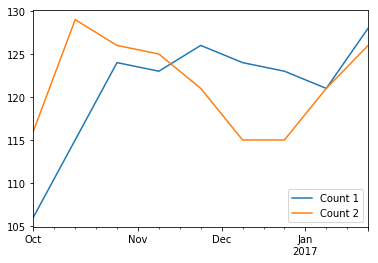

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()